# Fiber models - comparison of excitability upon extracellular electrical stimulation

- SD curve myelinated for different diameters at default distance
- SD curve unmyelinated for different diameters at default distance
- comparison SD curves myelinated vs. unmyelinated for few characteristic diameters
- comparison SD curves myelinated vs. unmyelinated for few characteristic distances
- conclusion about influence of myelination, fiber diameter and source distance on excitability 

###  Imports

In [1]:
import logging
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

from PySONIC.core import PulsedProtocol
from PySONIC.utils import logger, si_format
from PySONIC.neurons import getPointNeuron
from ExSONIC.core import IextraFiber, ExtracellularCurrent, unmyelinatedFiber, unmyelinatedFiberSundt, myelinatedFiberReilly, strengthDuration, currentDistance 
from ExSONIC.plt import strengthDurationCurve
from ExSONIC.utils import chronaxie

#Folder used to store the strength duration data
outdir='strengthDurationData'
#Folder used to store the current distance data
outdirCD='currentDistanceData'

##  Extracellular electrical stimulation

The extracellular stimulation consist of a cathodic current applied in corrispondence of the middle of the fiber.

In [2]:
# Stimulation parameters
fiberClass = 'extracellular_electrical_stim'
toffset = 20e-3  # s
n_dur = 10
tstim_range = np.logspace(-5, 0, n_dur)  # s

##  Extracellular electrical stimulation of a myelinated fiber
To model the myelinated fiber we use the Reilly model. We test the fiber for diameters in the range 5-20 um.

###  Strength-duration curve varying the fiber diameter for different source distances

In [13]:
# Fiber parameters
fiberType = 'reilly'
n_dia = 5
diameters = np.linspace(5e-6, 20e-6, n_dia)

logger.setLevel(logging.WARNING)
#Initializations
Ithr_myel_z5mm = {}
Qthr_myel_z5mm = {}
Ithr_myel_z10mm = {}
Qthr_myel_z10mm = {}
Ithr_myel_z20mm = {}
Qthr_myel_z20mm = {}
Irheo_myel_z5mm = np.zeros(n_dia)
Qrheo_myel_z5mm = np.zeros(n_dia)
chr_myel_z5mm = np.zeros(n_dia)
Irheo_myel_z10mm = np.zeros(n_dia)
Qrheo_myel_z10mm = np.zeros(n_dia)
chr_myel_z10mm = np.zeros(n_dia)
Irheo_myel_z20mm = np.zeros(n_dia)
Qrheo_myel_z20mm = np.zeros(n_dia)
chr_myel_z20mm = np.zeros(n_dia)

#Strength-duration results
for i, fiberD in enumerate(diameters): 
    zdistance = 5e-3
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir, zdistance)
    Ithr = np.absolute(df.values[:,1])        # current thresholds for different stimulus duration
    Irheo_myel_z5mm[i] = np.nanmin(Ithr)      # rheobase current
    Qthr = Ithr * tstim_range                 # charge thresholds for different stimulus duration
    Qrheo_myel_z5mm[i] = np.nanmin(Qthr)      # rheobase charge 
    chr_myel_z5mm[i] = chronaxie(tstim_range, Ithr)      # chronaxie
    Ithr_myel_z5mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr_myel_z5mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr      
    
    zdistance = 1e-2
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir, zdistance)
    Ithr = np.absolute(df.values[:,1])            
    Irheo_myel_z10mm[i] = np.nanmin(Ithr)       
    Qthr = Ithr * tstim_range           
    Qrheo_myel_z10mm[i] = np.nanmin(Qthr)      
    chr_myel_z10mm[i] = chronaxie(tstim_range, Ithr)   
    Ithr_myel_z10mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr_myel_z10mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr   
    
    zdistance = 2e-2
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir, zdistance)
    Ithr = np.absolute(df.values[:,1])               
    Irheo_myel_z20mm[i] = np.nanmin(Ithr)      
    Qthr = Ithr * tstim_range           
    Qrheo_myel_z20mm[i] = np.nanmin(Qthr)     
    chr_myel_z20mm[i] = chronaxie(tstim_range, Ithr)   
    Ithr_myel_z20mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr_myel_z20mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr
    
SDtau_myel_z5mm = Qrheo_myel_z5mm / Irheo_myel_z5mm   # strength duration time constant 
SDtau_myel_z10mm = Qrheo_myel_z10mm / Irheo_myel_z10mm                
SDtau_myel_z20mm = Qrheo_myel_z20mm / Irheo_myel_z20mm    

<IPython.core.display.Javascript object>


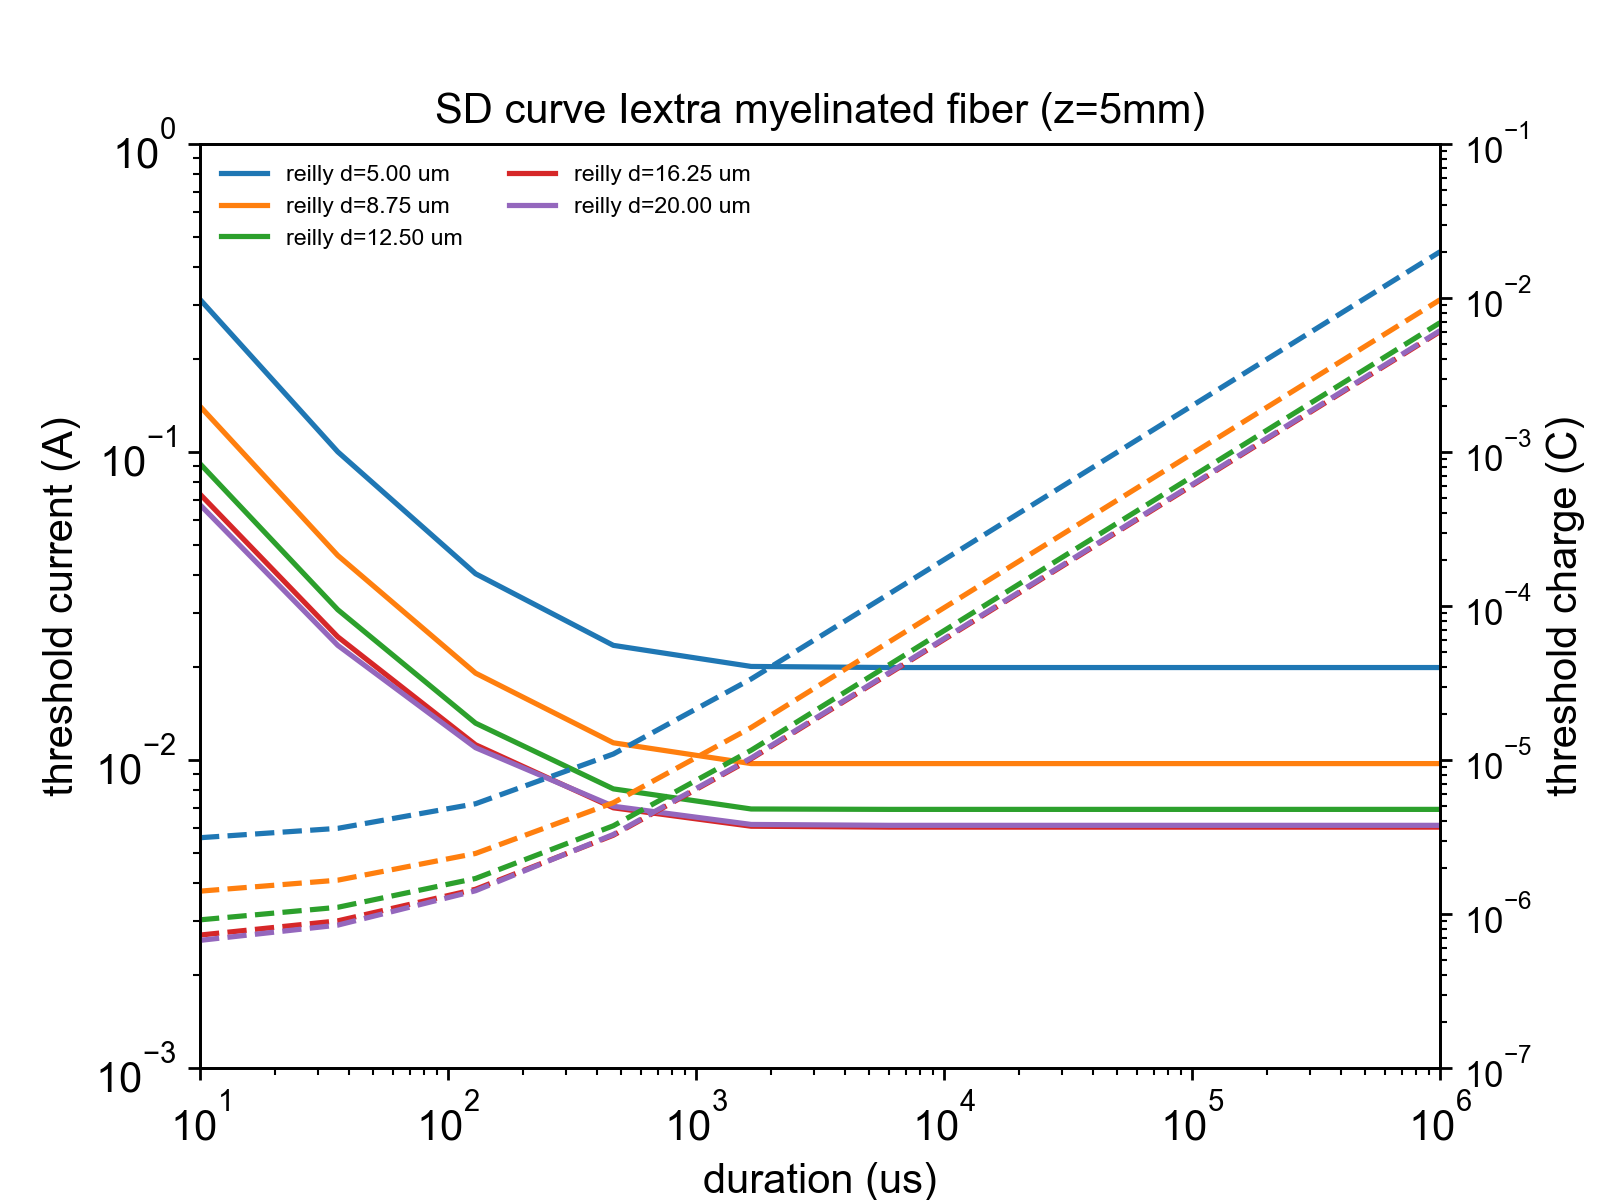

In [10]:
# Plot strength-duration curve, zsource=5mm
title = 'SD curve Iextra myelinated fiber (z=5mm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_myel_z5mm, thrs2=Qthr_myel_z5mm,
    yfactor=1, scale='log', plot_chr=False,)

<IPython.core.display.Javascript object>


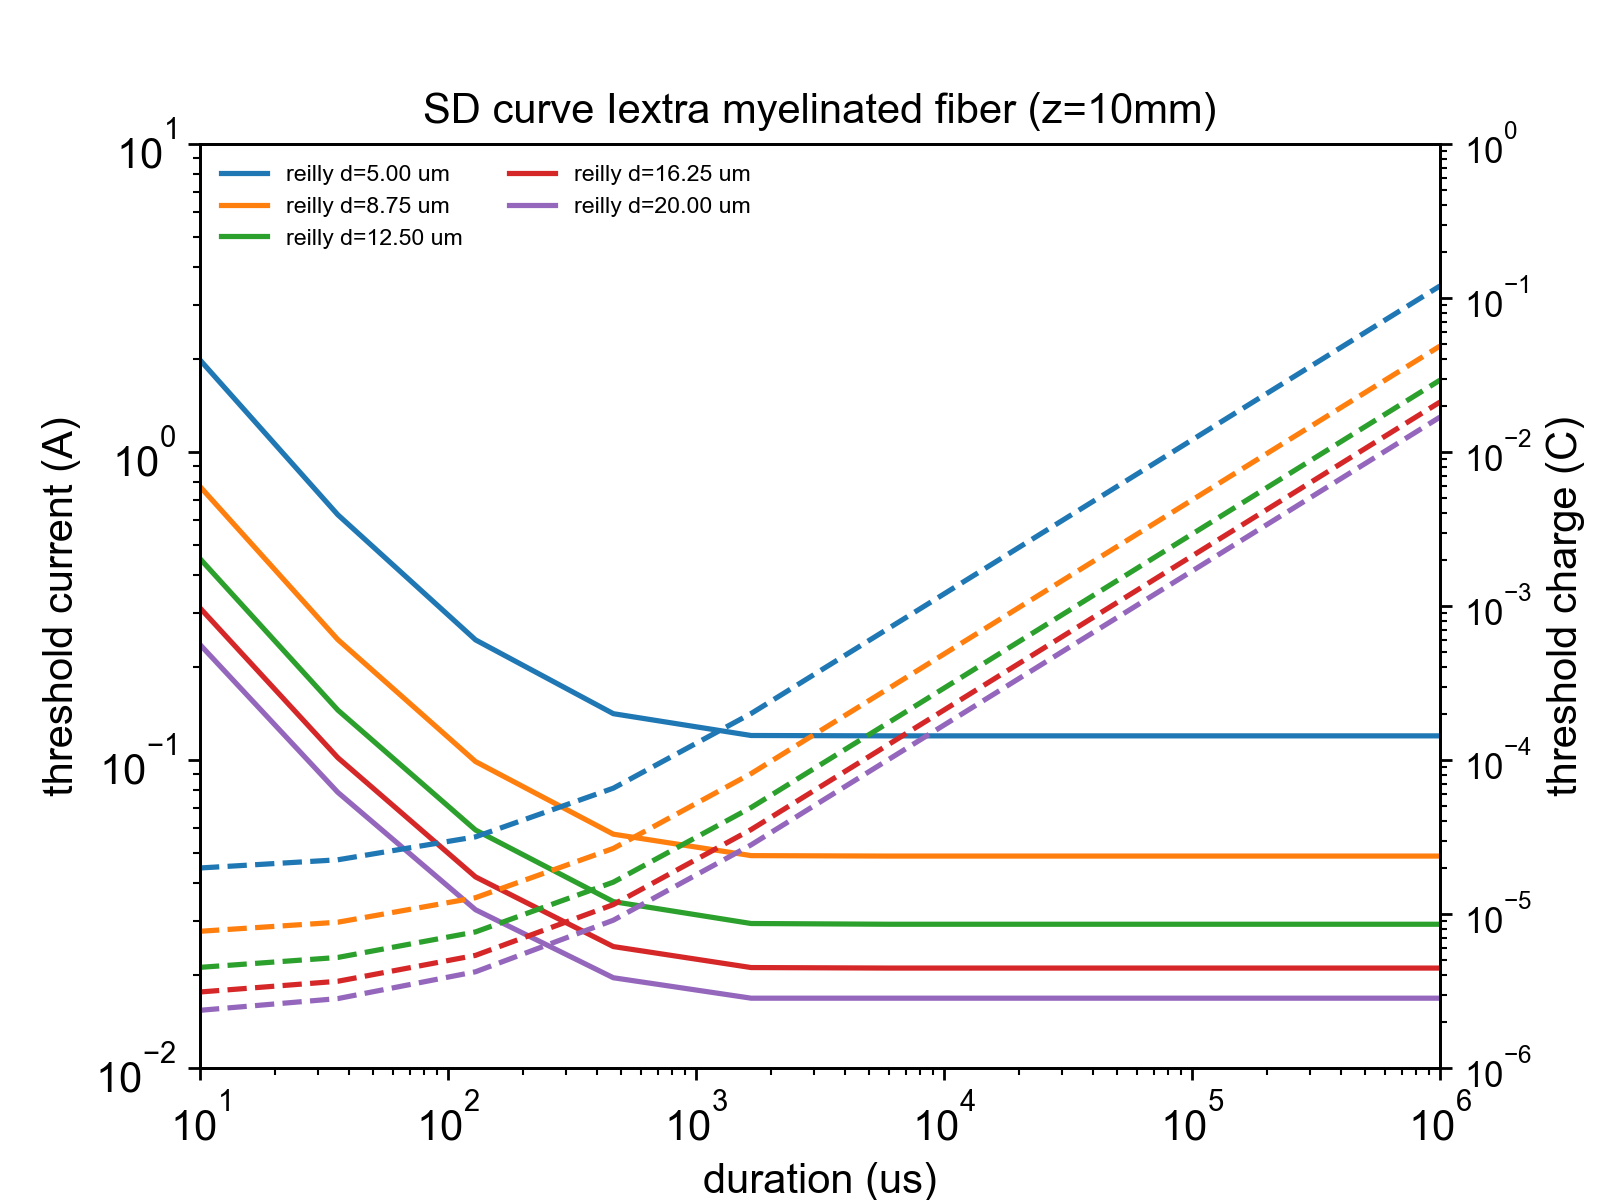

In [11]:
# Plot strength-duration curve, zsource=10mm
title = 'SD curve Iextra myelinated fiber (z=10mm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_myel_z10mm, thrs2=Qthr_myel_z10mm,
    yfactor=1, scale='log', plot_chr=False,)

<IPython.core.display.Javascript object>


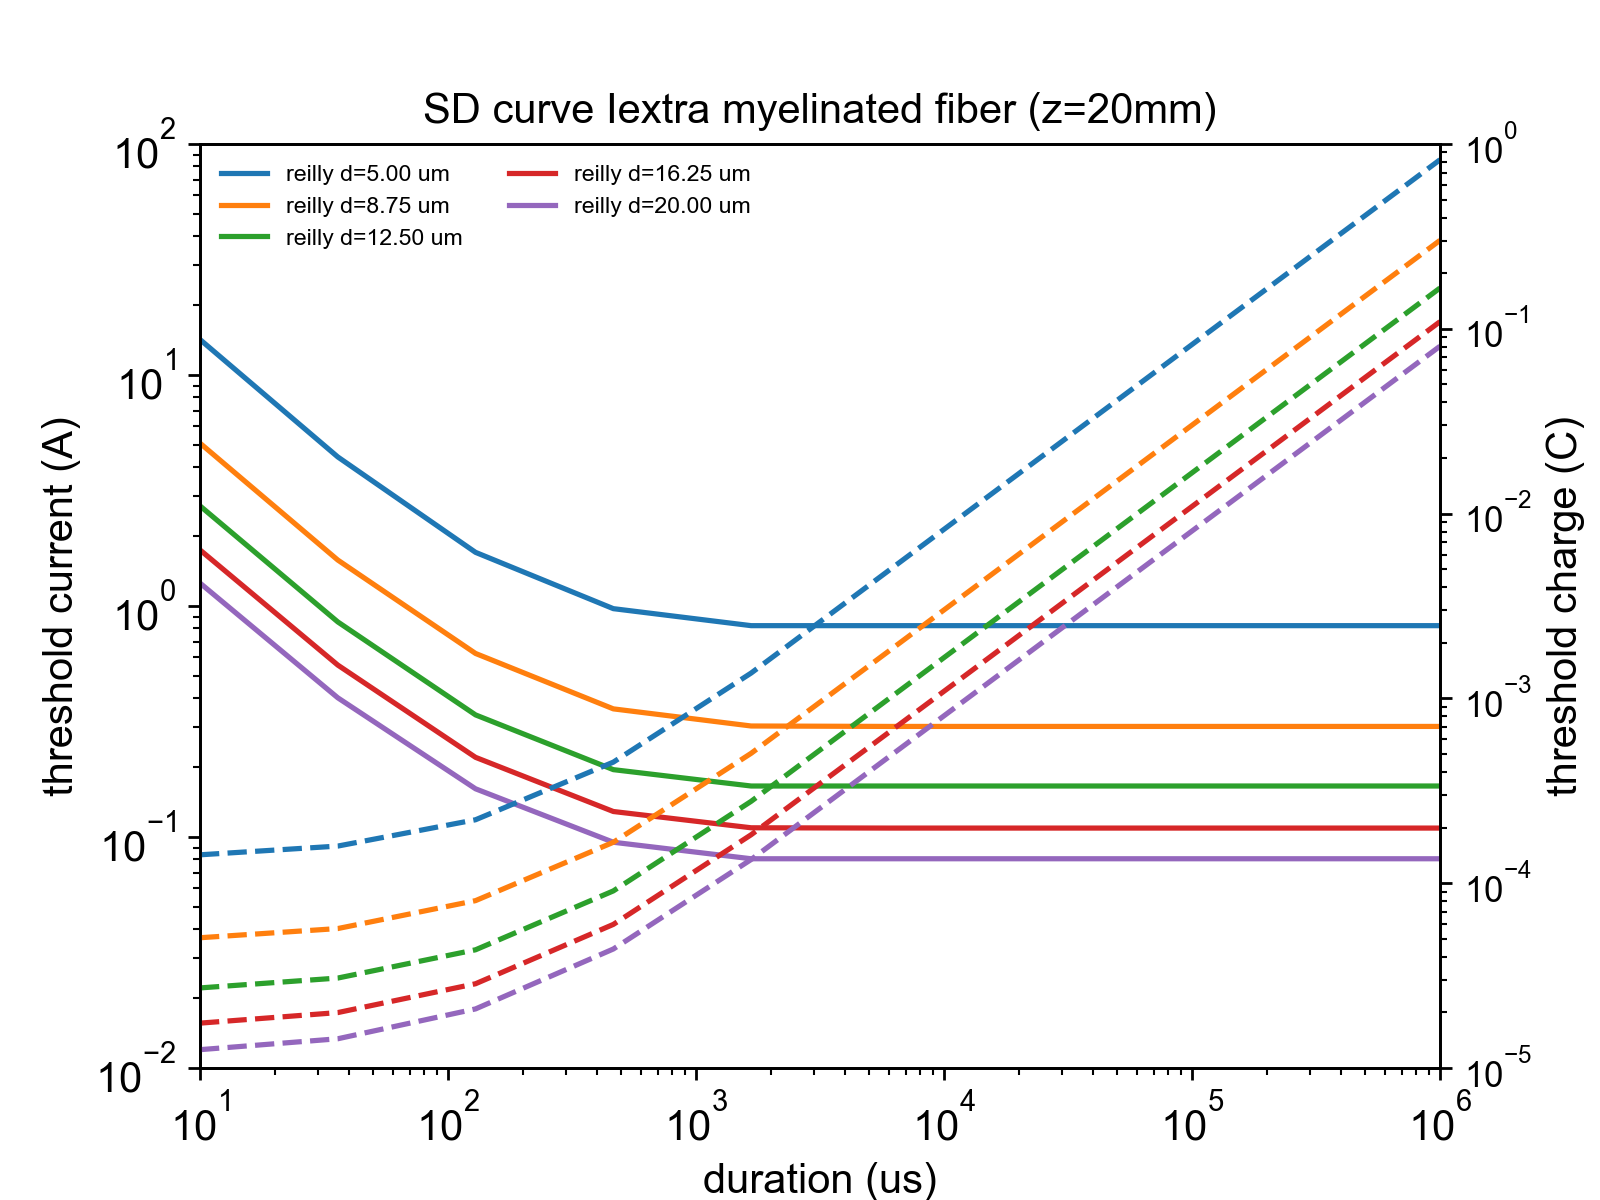

In [12]:
# Plot strength-duration curve, zsource=20mm
title = 'SD curve Iextra myelinated fiber (z=20mm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_myel_z20mm, thrs2=Qthr_myel_z20mm,
    yfactor=1, scale='log', plot_chr=False,)

###  Strength-duration curve varying the source distance (diameter = 12.5 um)

<IPython.core.display.Javascript object>


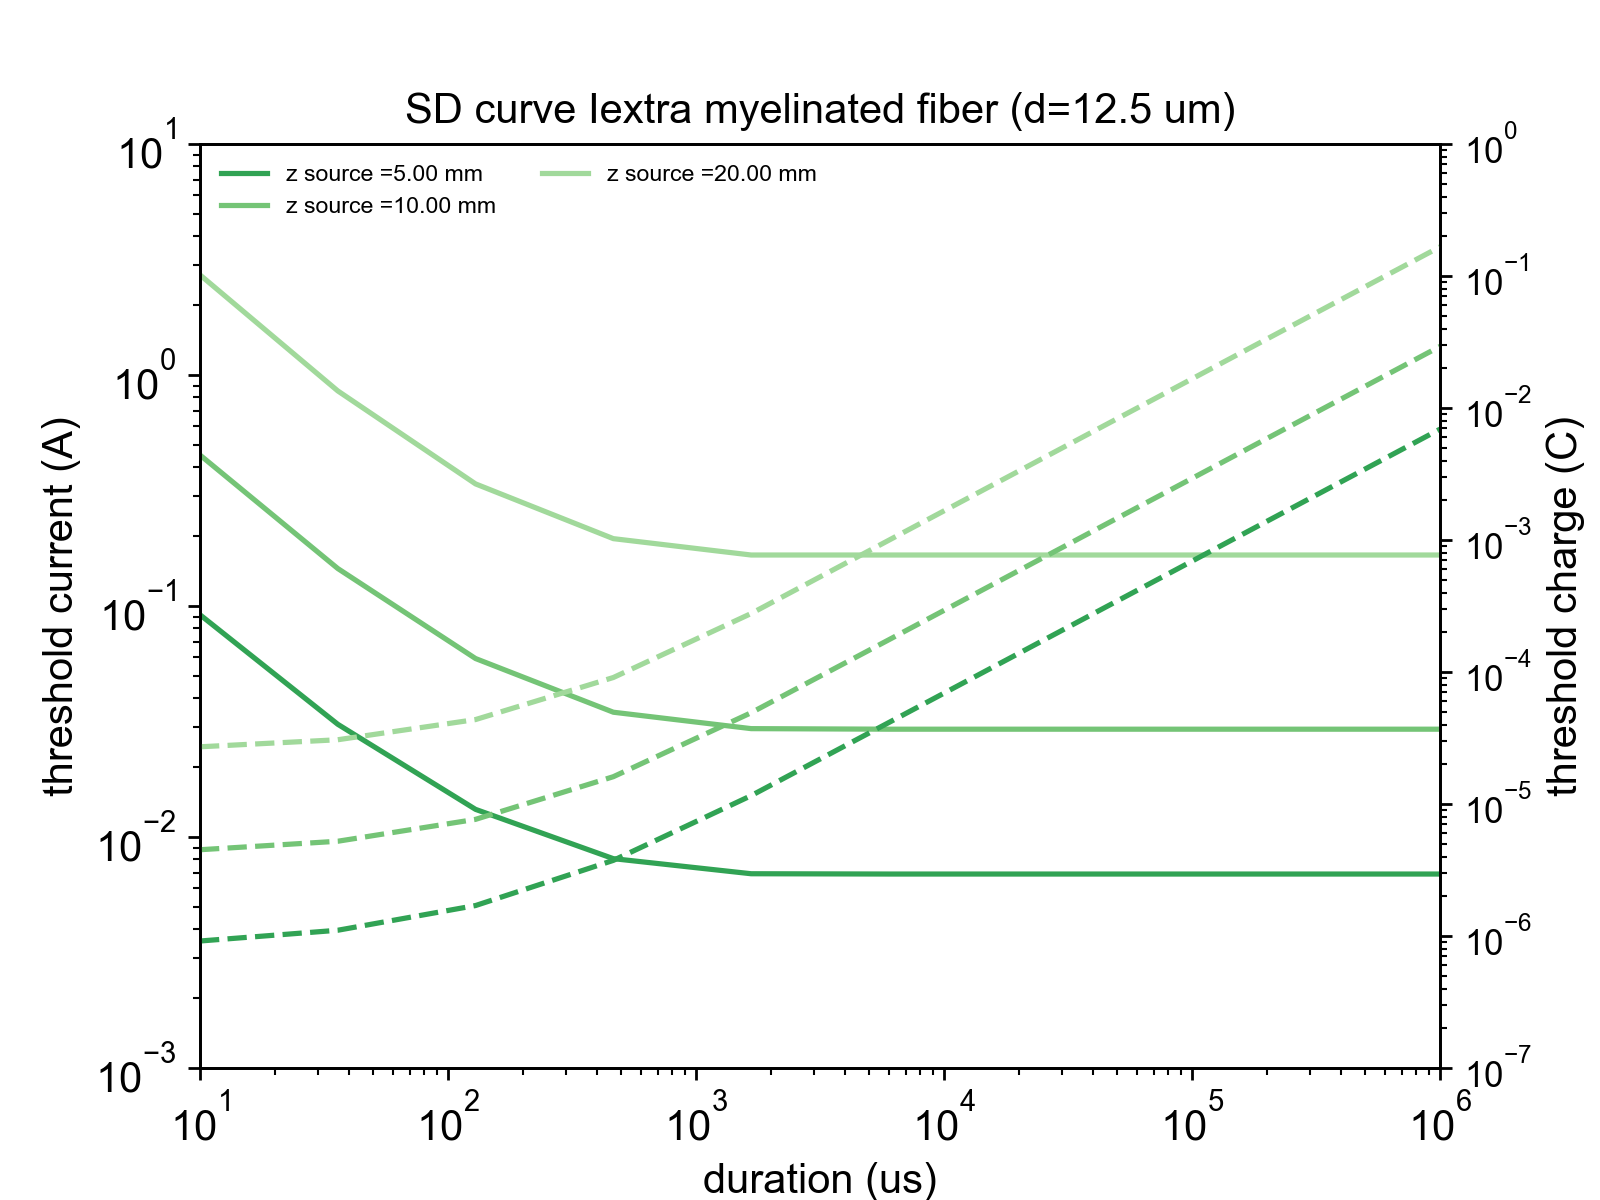

In [11]:
fiberType = 'reilly'
fiberD = 12.5e-6
zdistances = [5e-3, 1e-2, 2e-2]
Ithr_myel = {}
Qthr_myel = {}
logger.setLevel(logging.WARNING)

for i, zdistance in enumerate(zdistances): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir, zdistance)
    Ithr = df.values[:,1]
    Ithr_myel[f'z source ={(zdistance*1e3):.2f} mm'] = Ithr
    Qthr = Ithr * tstim_range
    Qthr_myel[f'z source ={(zdistance*1e3):.2f} mm'] = Qthr

title = 'SD curve Iextra myelinated fiber (d=12.5 um)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[8], colors[9], colors[10]]
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_myel, thrs2=Qthr_myel,
    yfactor=1, scale='log', plot_chr=False, colors=colors)

##  Extracellular electrical stimulation of a unmyelinated fiber
To model the unmyelinated fiber we use the Sundt model. We test the fiber for diameters in the range 0.2-1.5 um.

###  Strength-duration curve varying the fiber diameter for different source distances

In [14]:
# Fiber parameters
fiberType = 'sundt'
n_dia = 5
diameters = np.linspace(0.2e-6, 1.5e-6, n_dia)

logger.setLevel(logging.WARNING)
#Initializations
Ithr_unmyel_z5mm = {}
Qthr_unmyel_z5mm = {}
Ithr_unmyel_z10mm = {}
Qthr_unmyel_z10mm = {}
Ithr_unmyel_z20mm = {}
Qthr_unmyel_z20mm = {}
Irheo_unmyel_z5mm = np.zeros(n_dia)
Qrheo_unmyel_z5mm = np.zeros(n_dia)
chr_unmyel_z5mm = np.zeros(n_dia)
Irheo_unmyel_z10mm = np.zeros(n_dia)
Qrheo_unmyel_z10mm = np.zeros(n_dia)
chr_unmyel_z10mm = np.zeros(n_dia)
Irheo_unmyel_z20mm = np.zeros(n_dia)
Qrheo_unmyel_z20mm = np.zeros(n_dia)
chr_unmyel_z20mm = np.zeros(n_dia)

#Strength-duration results
for i, fiberD in enumerate(diameters): 
    zdistance = 5e-3
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir, zdistance)
    Ithr = np.absolute(df.values[:,1])        # current thresholds for different stimulus duration
    Irheo_unmyel_z5mm[i] = np.nanmin(Ithr)    # rheobase current
    Qthr = Ithr * tstim_range                 # charge thresholds for different stimulus duration
    Qrheo_unmyel_z5mm[i] = np.nanmin(Qthr)    # rheobase charge 
    chr_unmyel_z5mm[i] = chronaxie(tstim_range, Ithr)   # chronaxie
    Ithr_unmyel_z5mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr_unmyel_z5mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr   
    
    zdistance = 1e-2
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir, zdistance)
    Ithr = np.absolute(df.values[:,1])               
    Irheo_unmyel_z10mm[i] = np.nanmin(Ithr)   
    Qthr = Ithr * tstim_range            
    Qrheo_unmyel_z10mm[i] = np.nanmin(Qthr)     
    chr_unmyel_z10mm[i] = chronaxie(tstim_range, Ithr) 
    Ithr_unmyel_z10mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr_unmyel_z10mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr
    
    zdistance = 2e-2
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir, zdistance)
    Ithr = np.absolute(df.values[:,1])               
    Irheo_unmyel_z20mm[i] = np.nanmin(Ithr)   
    Qthr = Ithr * tstim_range            
    Qrheo_unmyel_z20mm[i] = np.nanmin(Qthr)       
    chr_unmyel_z20mm[i] = chronaxie(tstim_range, Ithr) 
    Ithr_unmyel_z20mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr_unmyel_z20mm[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr
    
SDtau_unmyel_z5mm = Qrheo_unmyel_z5mm / Irheo_unmyel_z5mm   # fiber time constant 
SDtau_unmyel_z10mm = Qrheo_unmyel_z10mm / Irheo_unmyel_z10mm                
SDtau_unmyel_z20mm = Qrheo_unmyel_z20mm / Irheo_unmyel_z20mm  

<IPython.core.display.Javascript object>


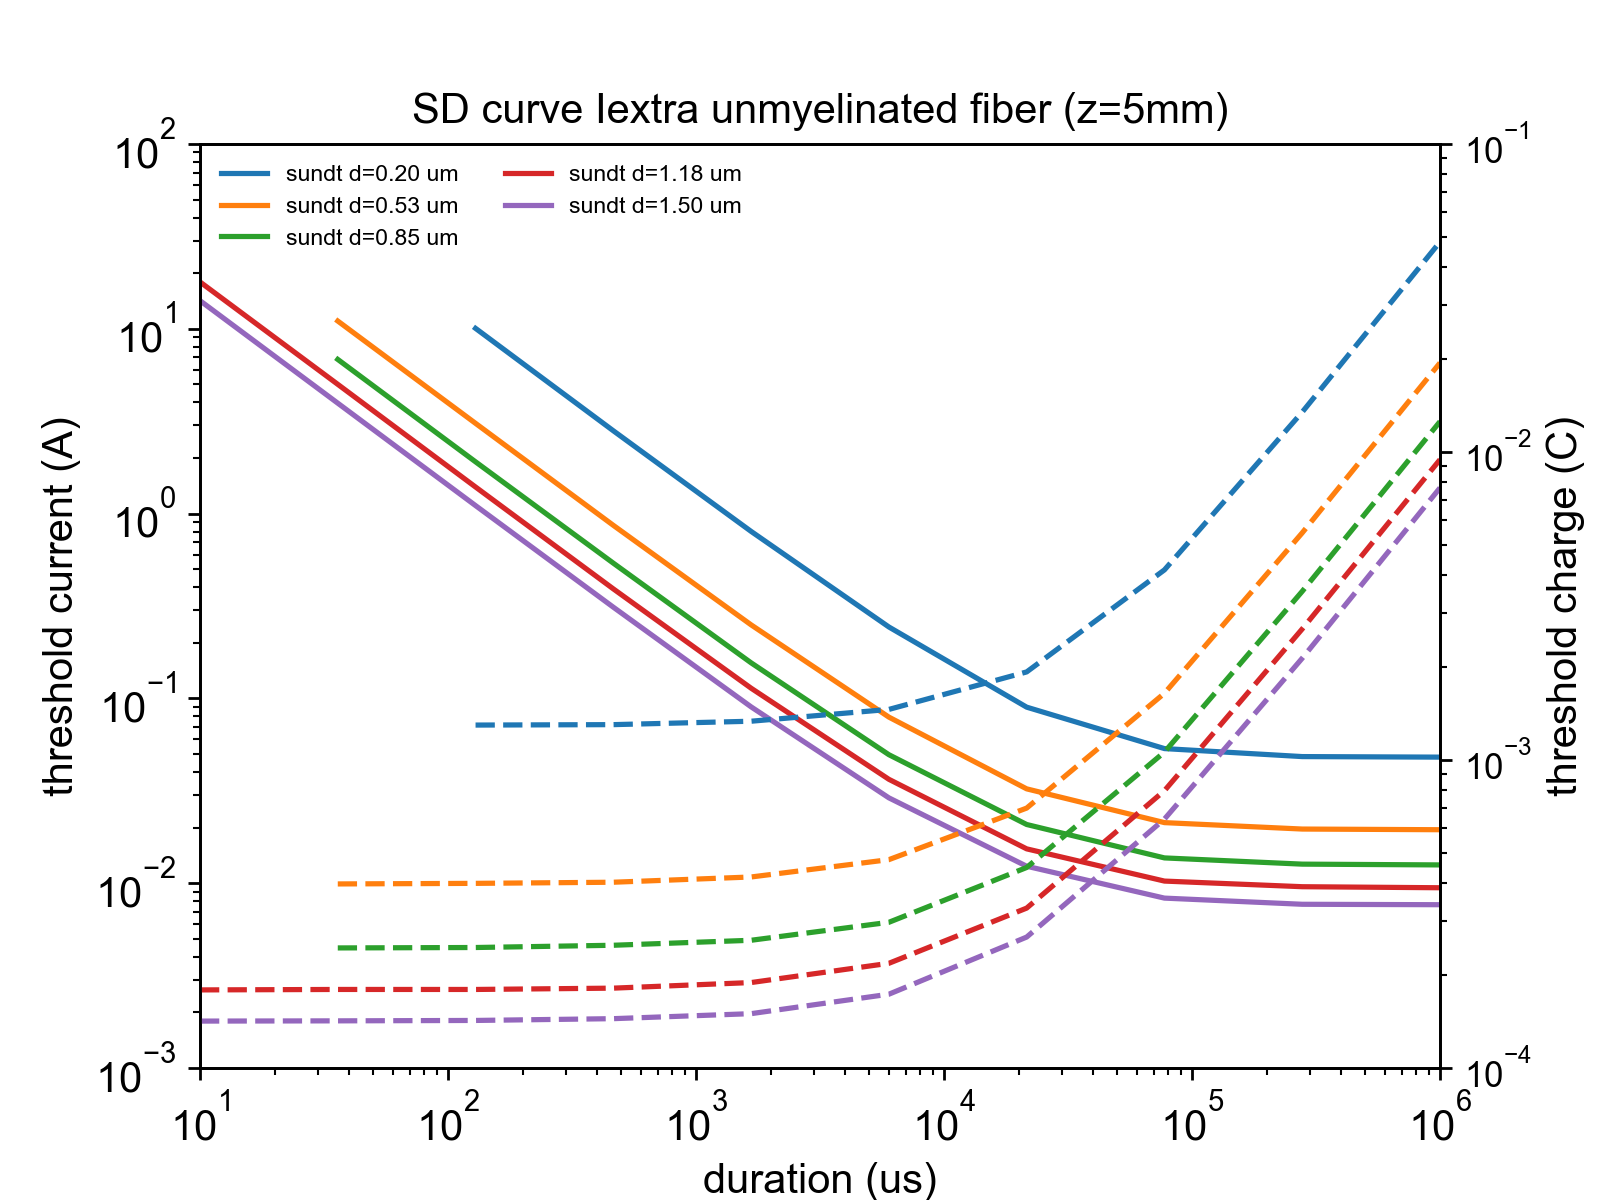

In [14]:
# Plot strength-duration curve, zsource=5mm
title = 'SD curve Iextra unmyelinated fiber (z=5mm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_unmyel_z5mm, thrs2=Qthr_unmyel_z5mm,
    yfactor=1, scale='log', plot_chr=False,)

<IPython.core.display.Javascript object>


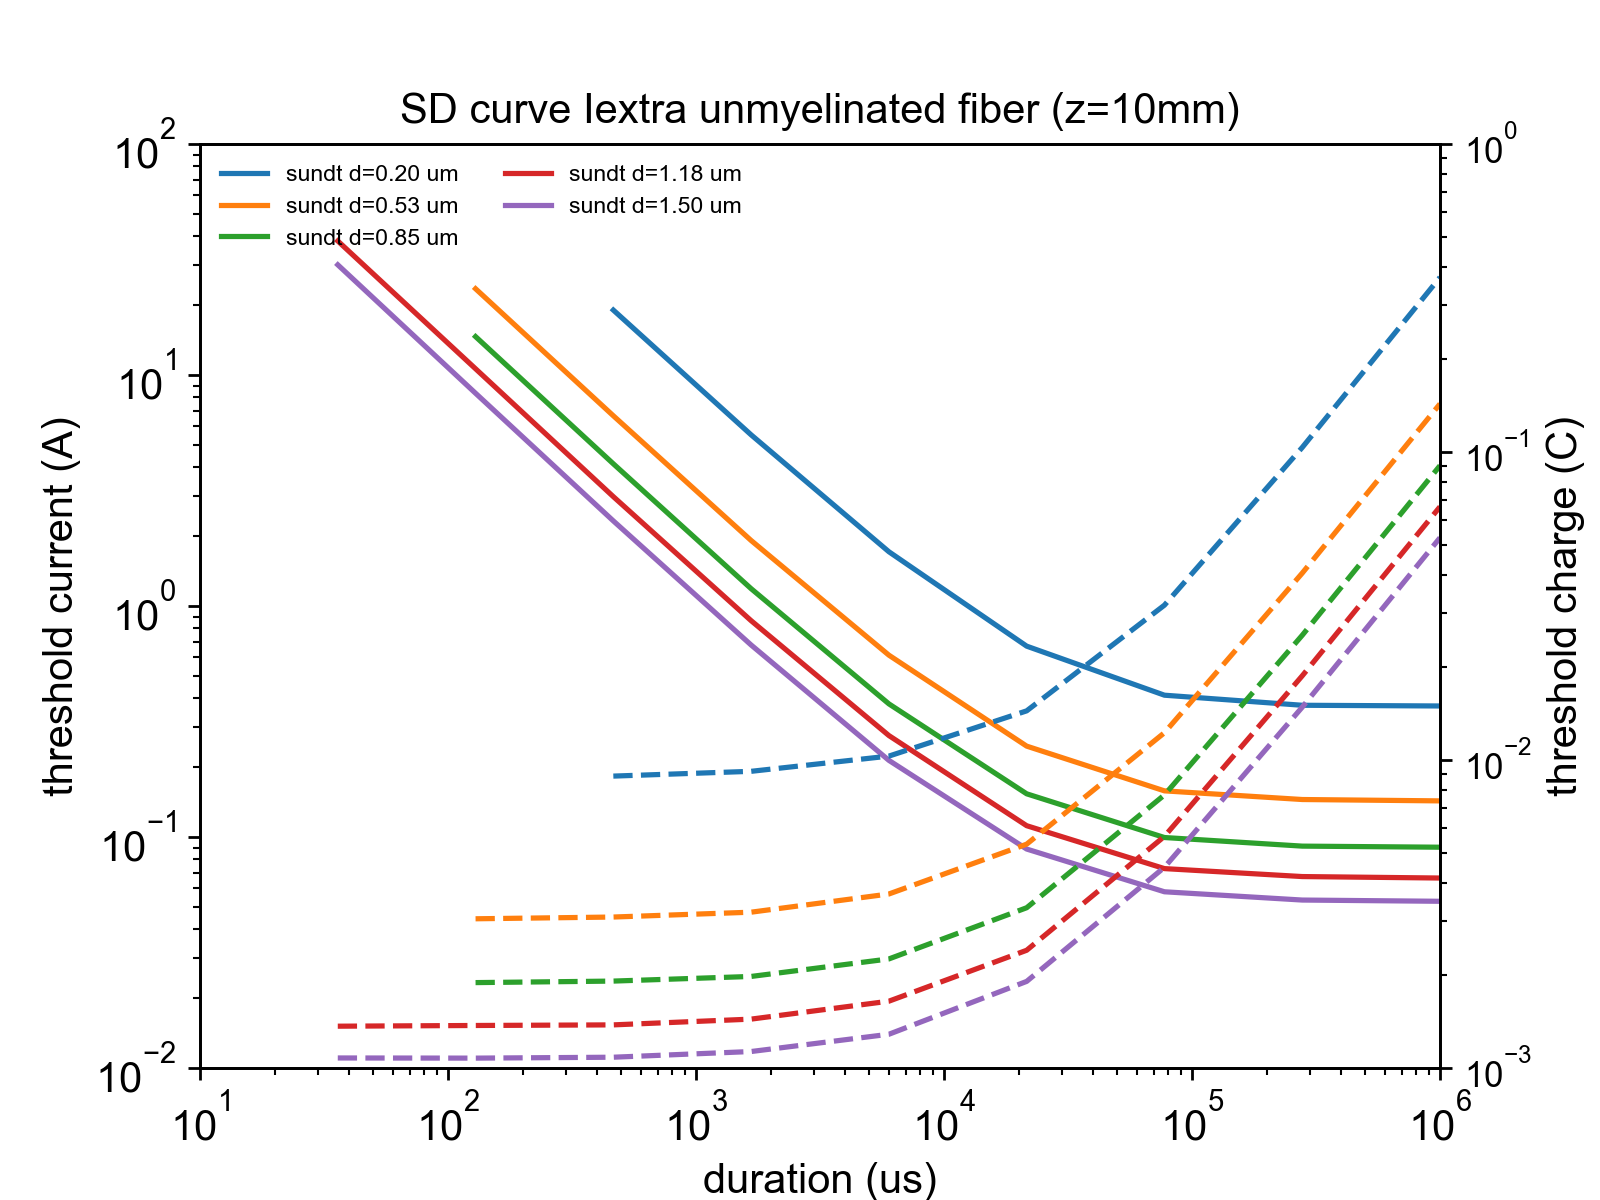

In [16]:
# Plot strength-duration curve, zsource=10mm
title = 'SD curve Iextra unmyelinated fiber (z=10mm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_unmyel_z10mm, thrs2=Qthr_unmyel_z10mm,
    yfactor=1, scale='log', plot_chr=False,)

<IPython.core.display.Javascript object>


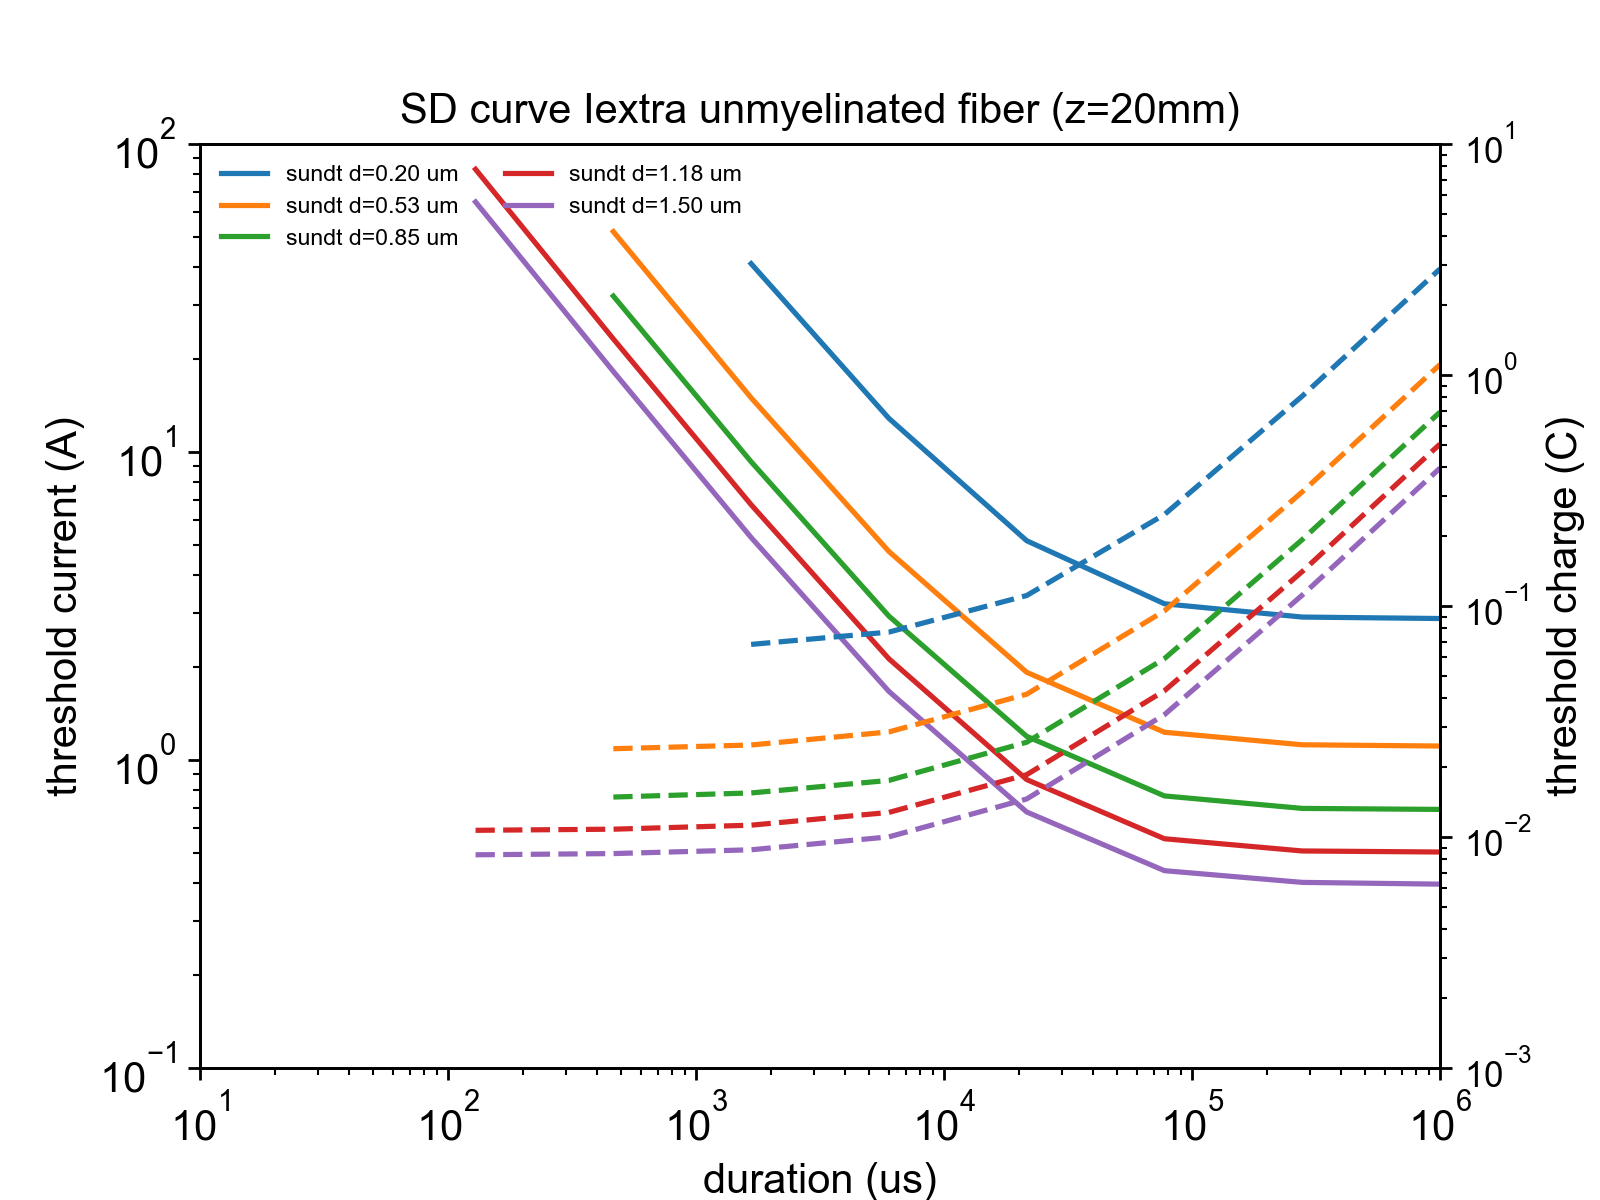

In [17]:
# Plot strength-duration curve, zsource=20mm
title = 'SD curve Iextra unmyelinated fiber (z=20mm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_unmyel_z20mm, thrs2=Qthr_unmyel_z20mm,
    yfactor=1, scale='log', plot_chr=False,)

###  Strength-duration curve varying the source distance (diameter = 0.85 um)

<IPython.core.display.Javascript object>


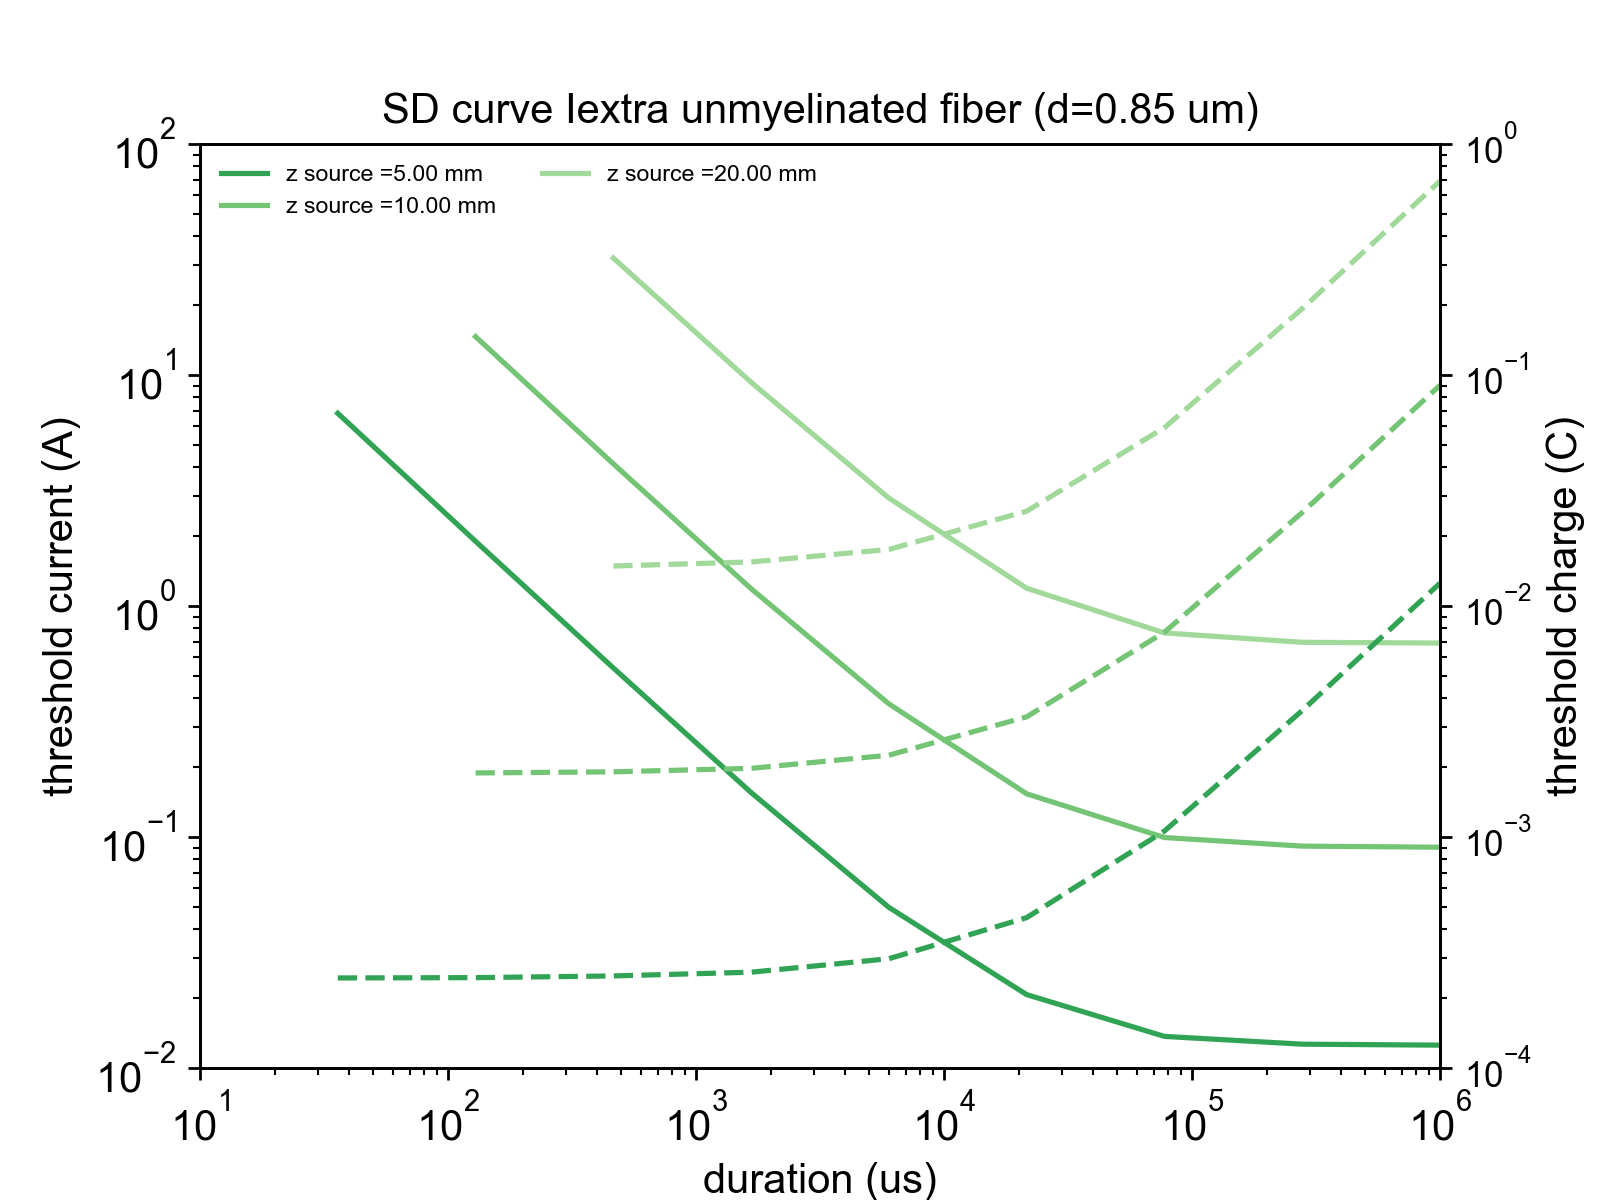

In [10]:
fiberType = 'sundt'
fiberD = 0.85e-6
zdistances = [5e-3, 1e-2, 2e-2]
Ithr_unmyel = {}
Qthr_unmyel = {}
logger.setLevel(logging.WARNING)

for i, zdistance in enumerate(zdistances): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir, zdistance)
    Ithr = df.values[:,1]
    Ithr_unmyel[f'z source ={(zdistance*1e3):.2f} mm'] = Ithr
    Qthr = Ithr * tstim_range
    Qthr_unmyel[f'z source ={(zdistance*1e3):.2f} mm'] = Qthr

title = 'SD curve Iextra unmyelinated fiber (d=0.85 um)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[8], colors[9], colors[10]]
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_unmyel, thrs2=Qthr_unmyel,
    yfactor=1, scale='log', plot_chr=False, colors=colors)

##  Comparison myelinated-unmyelinated fibers (source distance 10 mm)

In [8]:
Ithr_dict = {}
Qthr_dict = {}
logger.setLevel(logging.WARNING)

# Type of stimulation
fiberClass = 'extracellular_electrical_stim'
zdistance = 1e-2 

#Myelinated fiber
fiberType = 'reilly'
n_dia = 3
diameters_myel = np.linspace(20e-6, 5e-6, n_dia)

for i, fiberD in enumerate(diameters_myel):  
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir, zdistance)
    Ithr = df.values[:,1]
    Ithr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr = Ithr * tstim_range
    Qthr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr

# Unmyelinated fiber 
fiberType = 'sundt'
diameters_unmyel = np.linspace(1.5e-6, 0.2e-6, n_dia)

for i, fiberD in enumerate(diameters_unmyel):  
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir, zdistance)
    Ithr = df.values[:,1]
    Ithr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr = Ithr * tstim_range
    Qthr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr

<IPython.core.display.Javascript object>


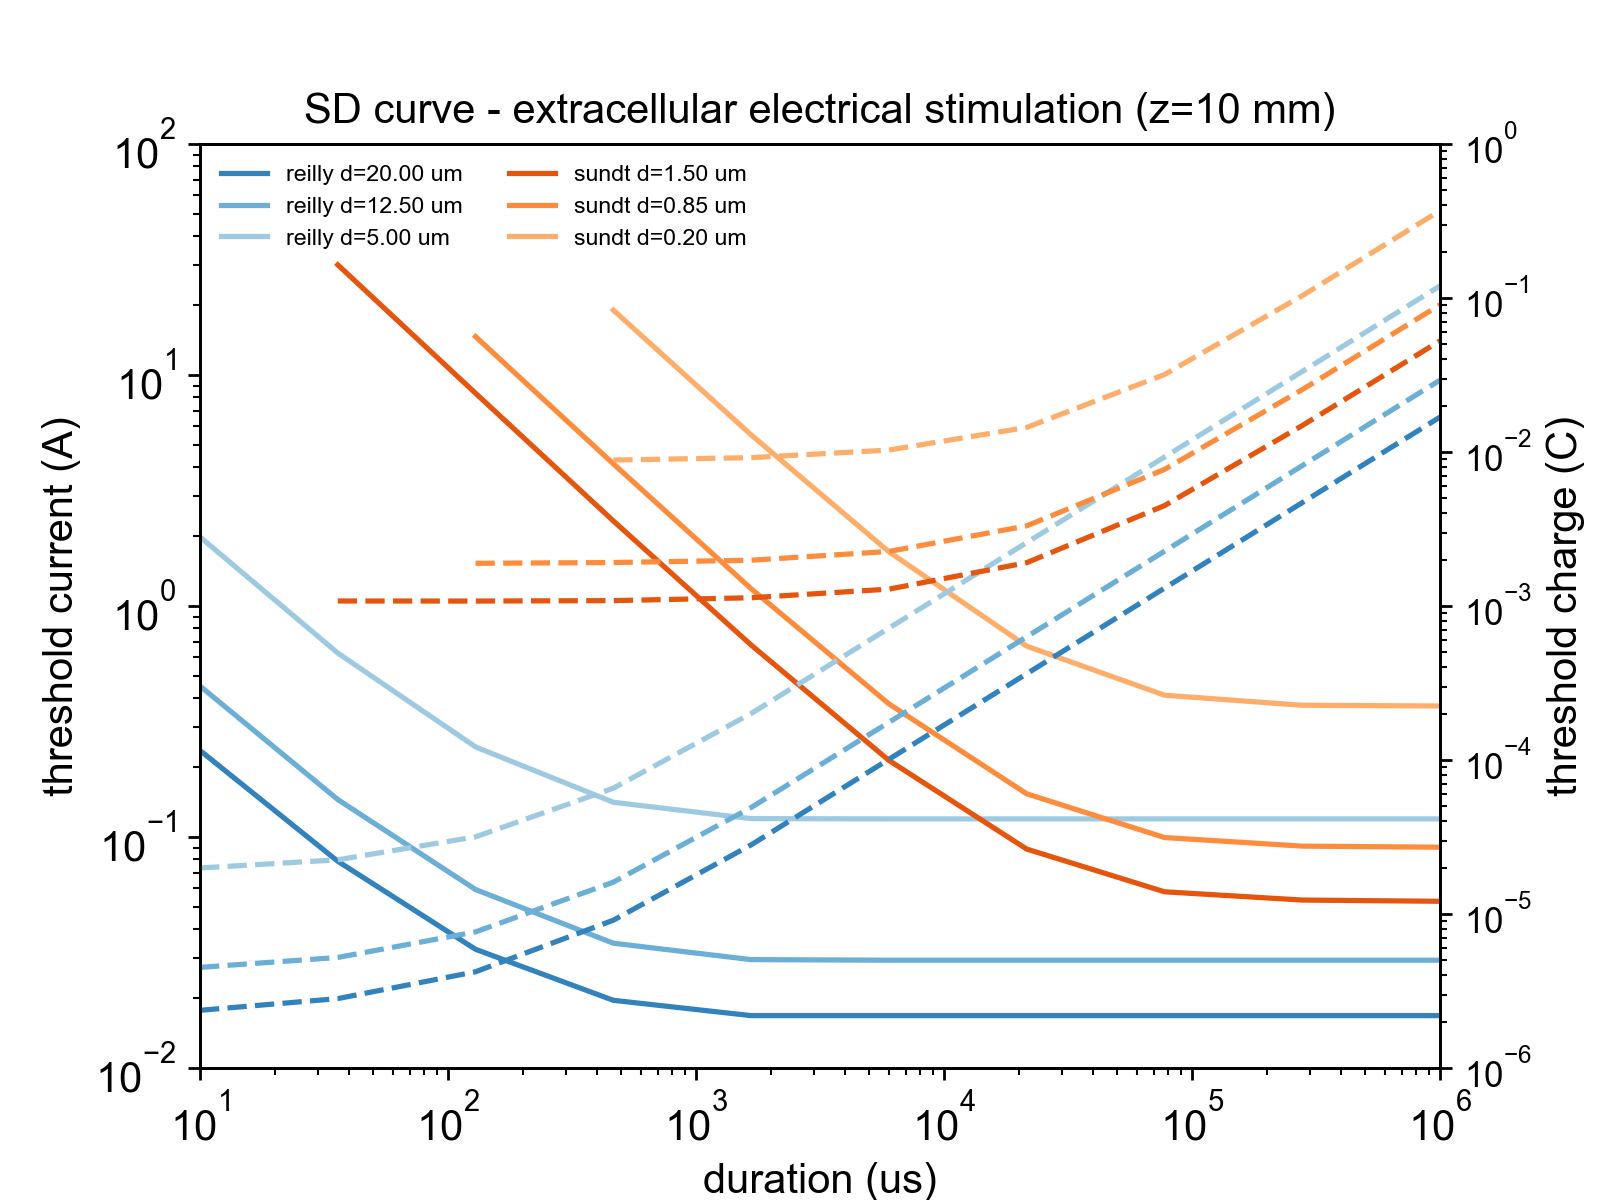

In [9]:
title = 'SD curve - extracellular electrical stimulation (z=10 mm)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[0], colors[1], colors[2], colors[4], colors[5], colors[6]]
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_dict, thrs2=Qthr_dict,
    yfactor=1, scale='log', plot_chr=False, colors=colors)

## Characterization of the fibers' behaviours

###  Rheobase current varying diameter and source distance

<IPython.core.display.Javascript object>


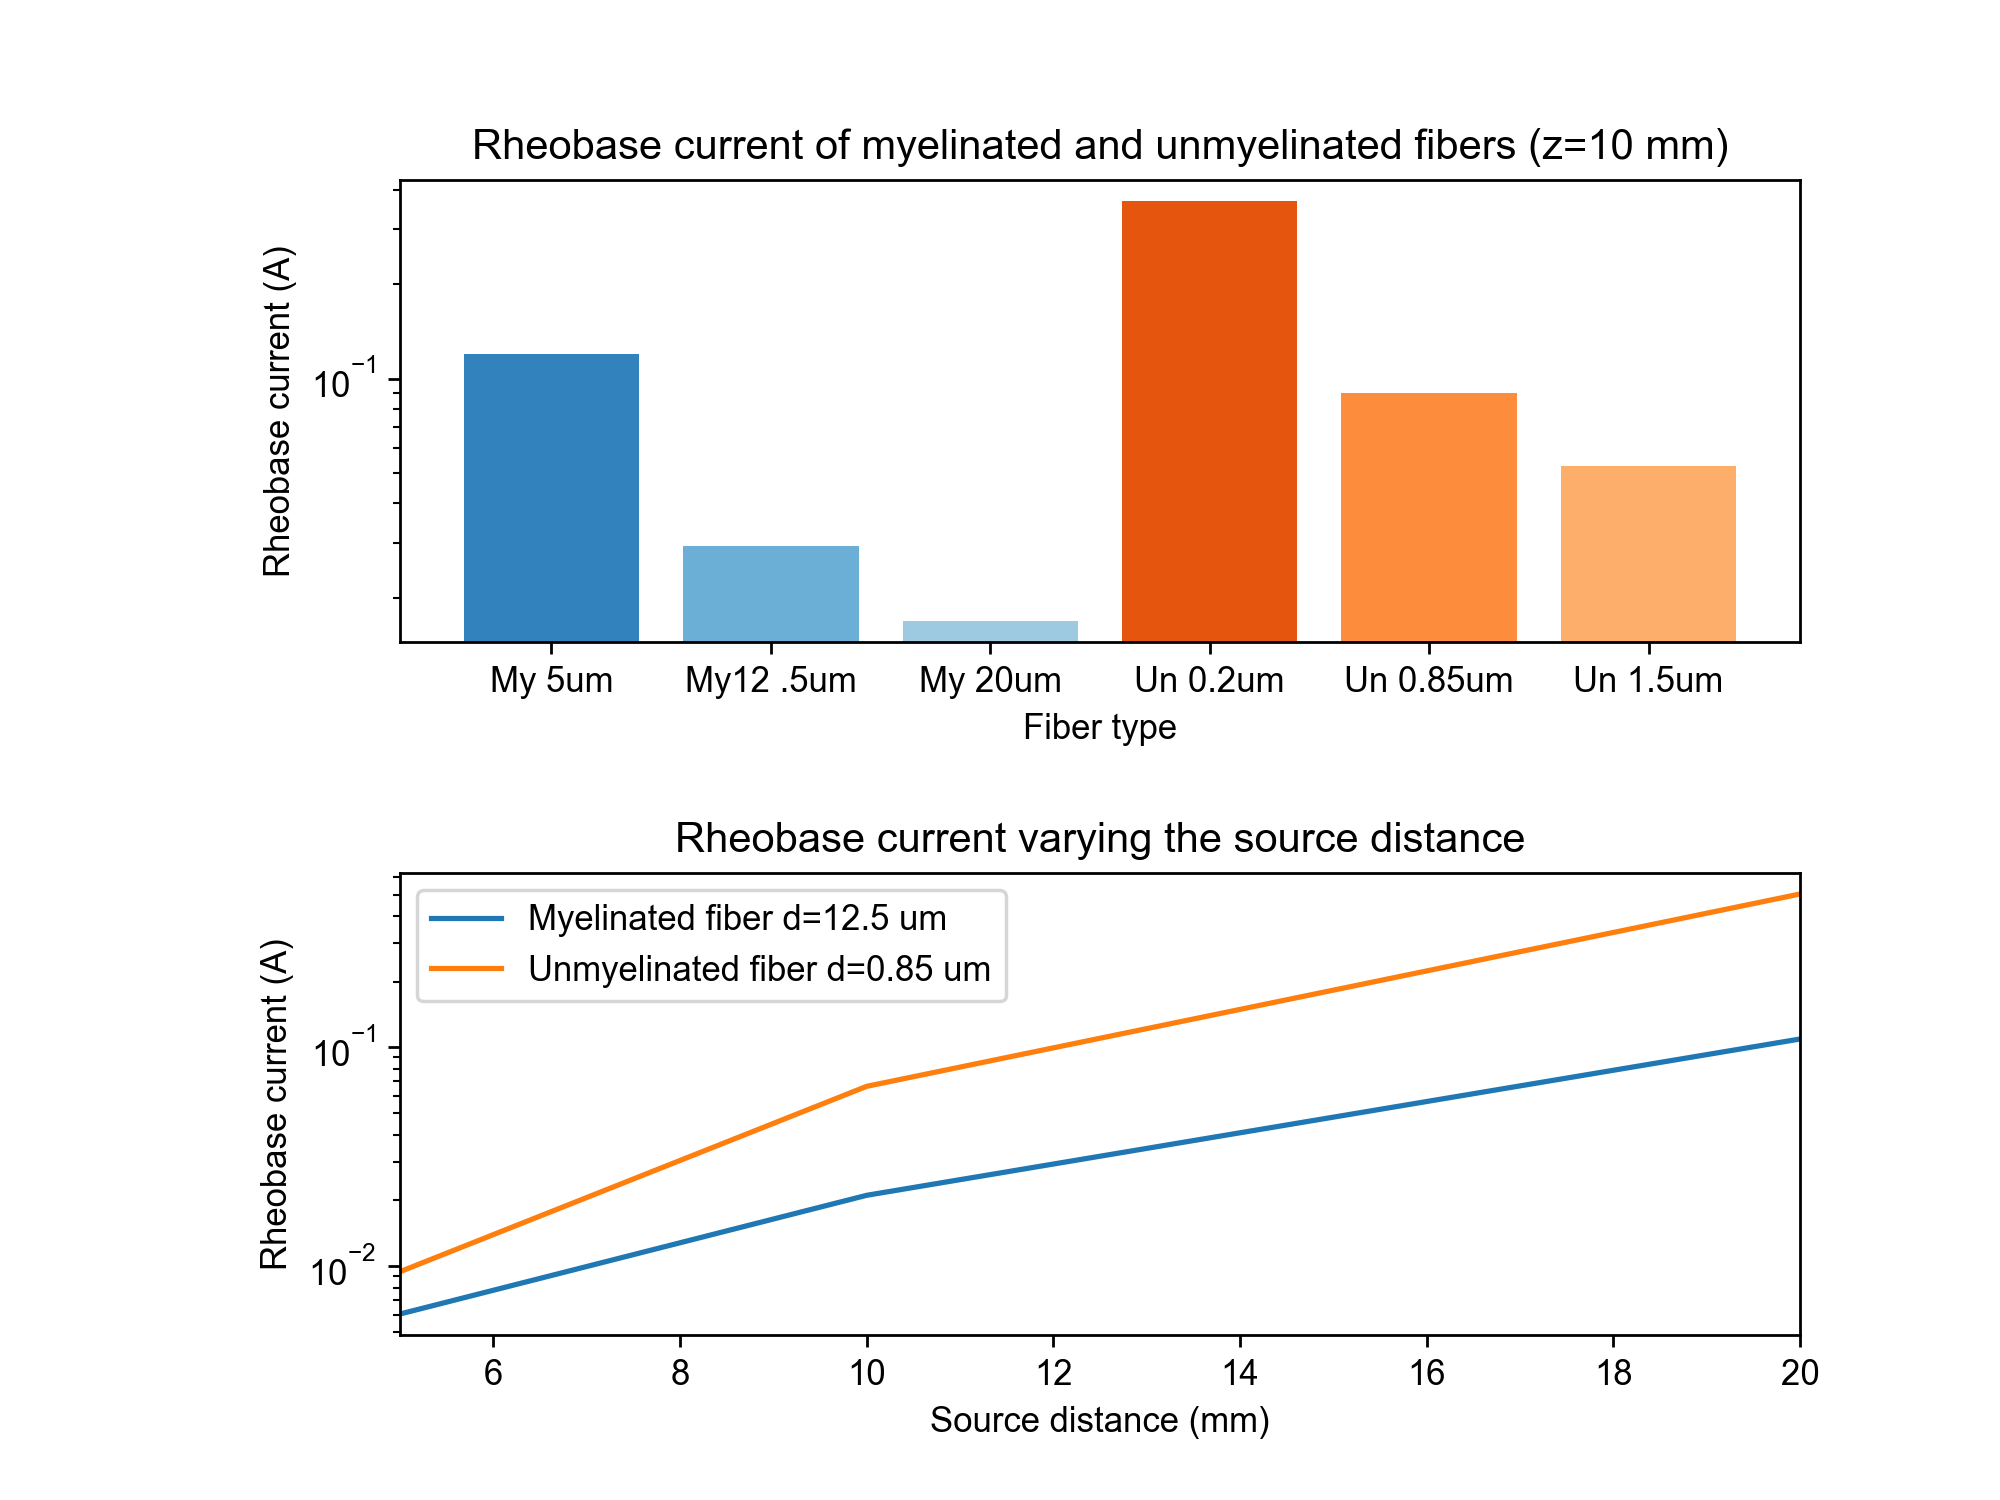

In [16]:
n_dia = 3
diameters_myel = np.linspace(5e-6, 20e-6, n_dia)
diameters_unmyel = np.linspace(0.2e-6, 1.5e-6, n_dia)
Irheo_myel = [Irheo_myel_z10mm[0], Irheo_myel_z10mm[2], Irheo_myel_z10mm[4]]
Irheo_unmyel = [Irheo_unmyel_z10mm[0], Irheo_unmyel_z10mm[2], Irheo_unmyel_z10mm[4]]
Irheo = np.concatenate((Irheo_myel, Irheo_unmyel))

# Rheobase current plot varying the fiber diameter ans the source distance
%matplotlib notebook
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
plt.subplots_adjust(left = 0.2, hspace=0.5)
ax=axes[0]
colors = plt.get_cmap('tab20c').colors
colors = [colors[0], colors[1], colors[2], colors[4], colors[5], colors[6]]
labels = ('My 5um', 'My12 .5um', 'My 20um', 'Un 0.2um', 'Un 0.85um', 'Un 1.5um')
ax.bar(labels, Irheo, color=colors)
ax.set_yscale('log')
ax.set_title('Rheobase current of myelinated and unmyelinated fibers (z=10 mm)')
ax.set_xlabel('Fiber type')
ax.set_ylabel('Rheobase current (A)')

ax=axes[1]
ax.set_title('Rheobase current varying the source distance')
ax.set_xlabel('Source distance (mm)')
ax.set_ylabel('Rheobase current (A)')
x = [5e-3, 1e-2, 2e-2]
y_myel = [Irheo_myel_z5mm[3], Irheo_myel_z10mm[3], Irheo_myel_z20mm[3]]
y_unmyel = [Irheo_unmyel_z5mm[3], Irheo_unmyel_z10mm[3], Irheo_unmyel_z20mm[3]]
ax.set_xlim(5, 20)
ax.set_yscale('log')
ax.plot (np.array(x)*1e3, y_myel, label='Myelinated fiber d=12.5 um')
ax.plot (np.array(x)*1e3, y_unmyel, label='Unmyelinated fiber d=0.85 um')
ax.legend()

###  Rheobase charge varying diameter and source distance

<IPython.core.display.Javascript object>


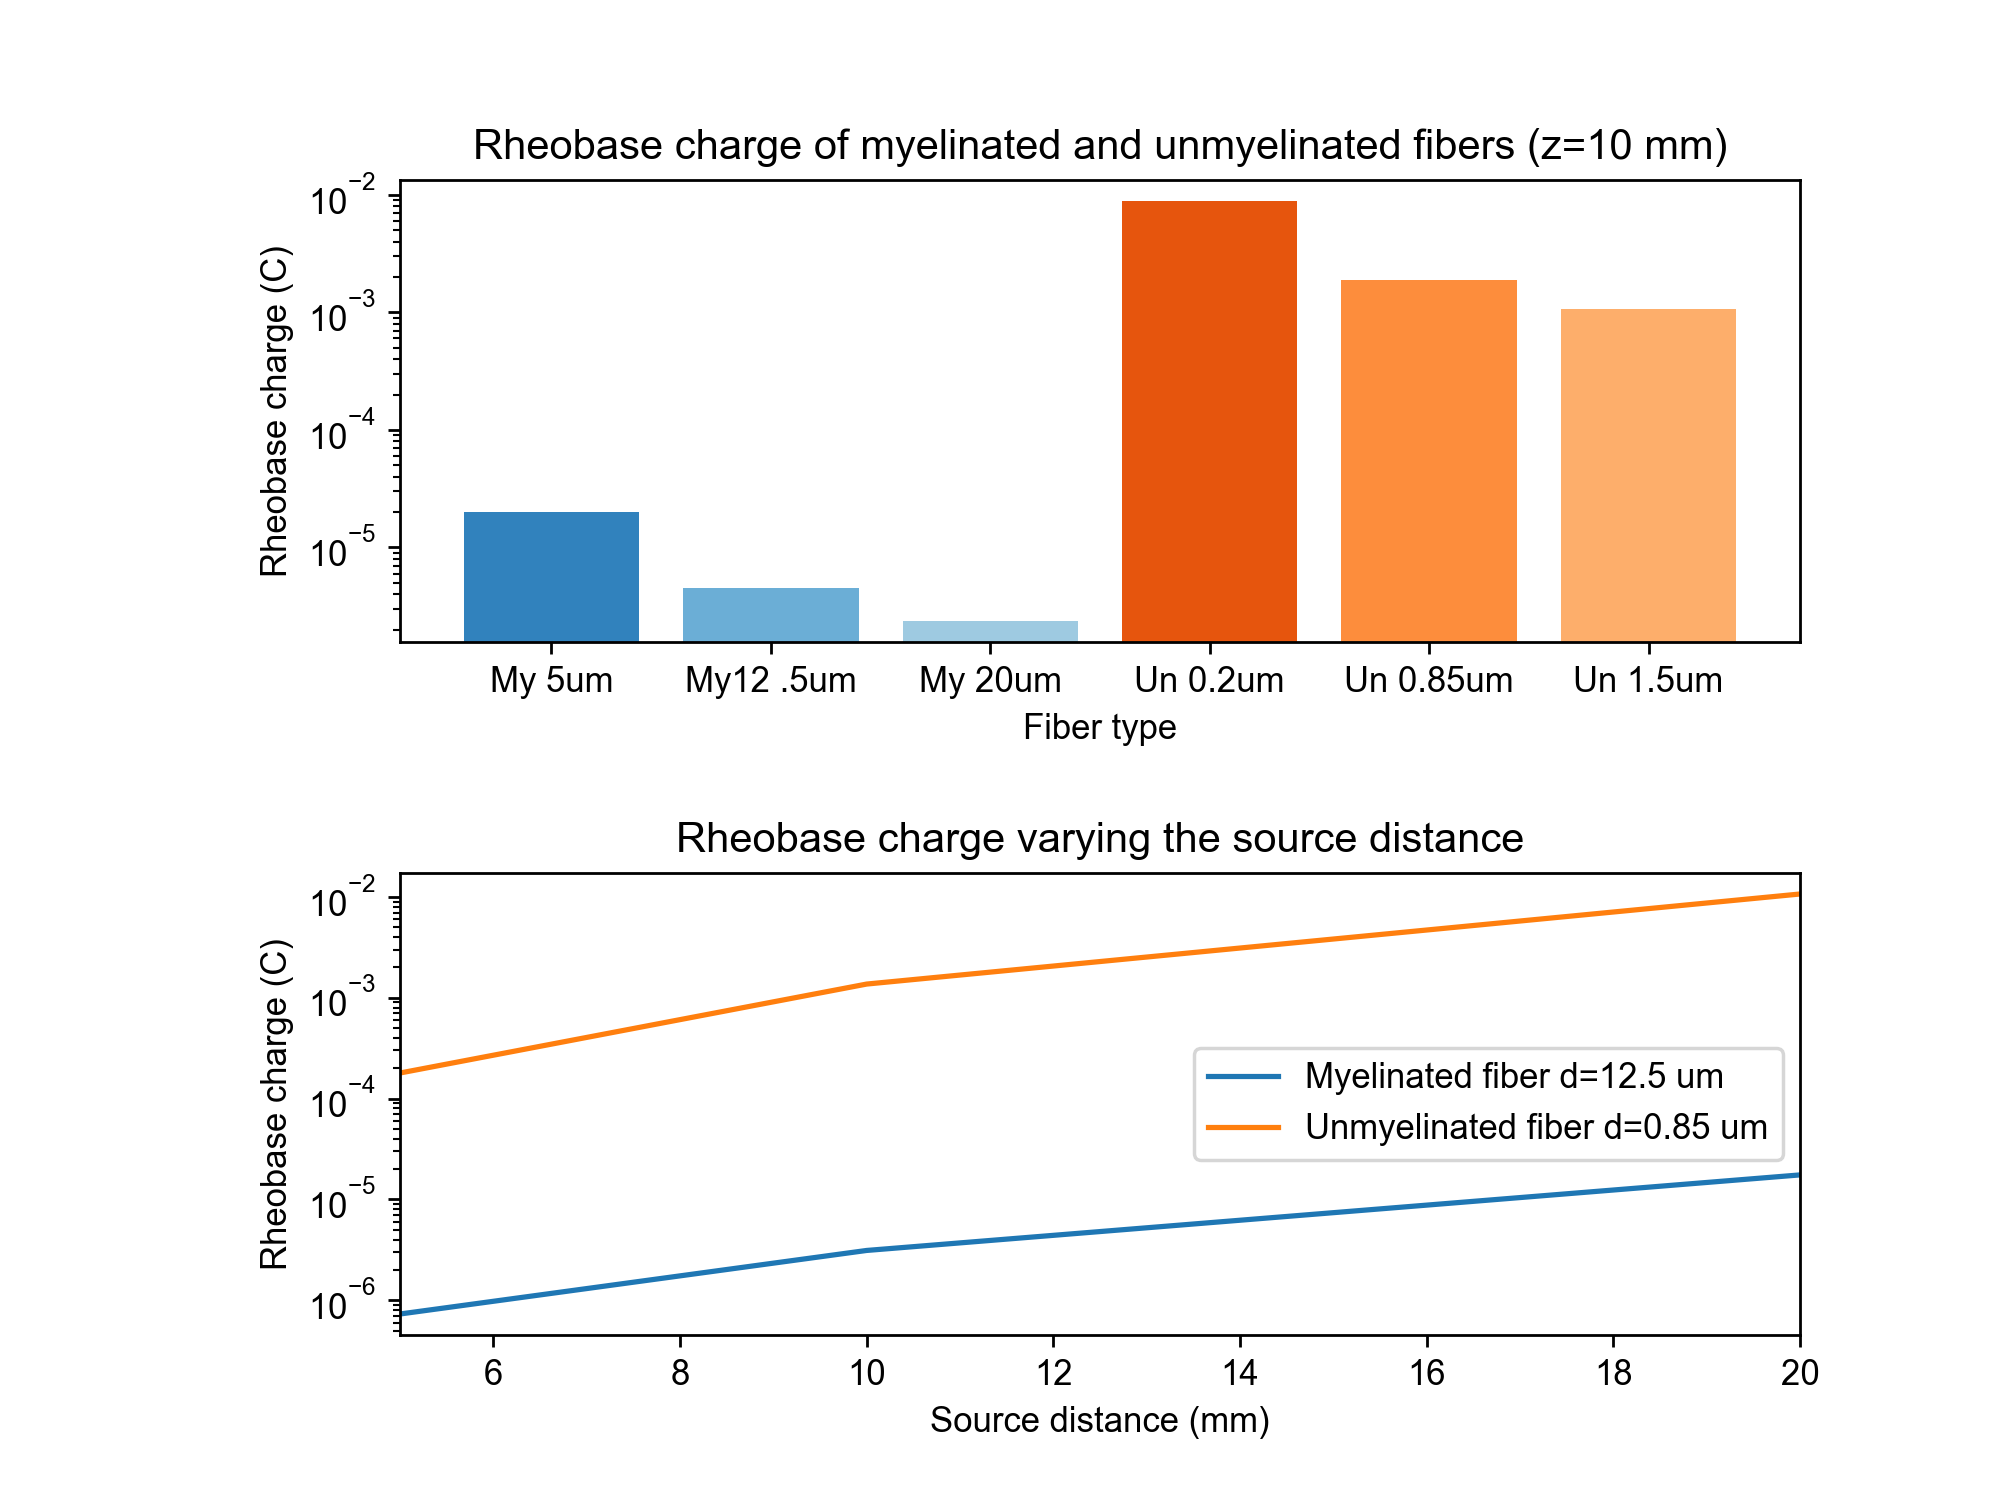

In [17]:
n_dia = 3
diameters_myel = np.linspace(5e-6, 20e-6, n_dia)
diameters_unmyel = np.linspace(0.2e-6, 1.5e-6, n_dia)
Qrheo_myel = [Qrheo_myel_z10mm[0], Qrheo_myel_z10mm[2], Qrheo_myel_z10mm[4]]
Qrheo_unmyel = [Qrheo_unmyel_z10mm[0], Qrheo_unmyel_z10mm[2], Qrheo_unmyel_z10mm[4]]
Qrheo = np.concatenate((Qrheo_myel, Qrheo_unmyel))

# Rheobase current plot varying the fiber diameter ans the source distance
%matplotlib notebook
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
plt.subplots_adjust(left = 0.2, hspace=0.5)
ax=axes[0]
colors = plt.get_cmap('tab20c').colors
colors = [colors[0], colors[1], colors[2], colors[4], colors[5], colors[6]]
labels = ('My 5um', 'My12 .5um', 'My 20um', 'Un 0.2um', 'Un 0.85um', 'Un 1.5um')
ax.bar(labels, Qrheo, color=colors)
ax.set_yscale('log')
ax.set_title('Rheobase charge of myelinated and unmyelinated fibers (z=10 mm)')
ax.set_xlabel('Fiber type')
ax.set_ylabel('Rheobase charge (C)')

ax=axes[1]
ax.set_title('Rheobase charge varying the source distance')
ax.set_xlabel('Source distance (mm)')
ax.set_ylabel('Rheobase charge (C)')
x = [5e-3, 1e-2, 2e-2]
y_myel = [Qrheo_myel_z5mm[3], Qrheo_myel_z10mm[3], Qrheo_myel_z20mm[3]]
y_unmyel = [Qrheo_unmyel_z5mm[3], Qrheo_unmyel_z10mm[3], Qrheo_unmyel_z20mm[3]]
ax.set_xlim(5, 20)
ax.set_yscale('log')
ax.plot (np.array(x)*1e3, y_myel, label='Myelinated fiber d=12.5 um')
ax.plot (np.array(x)*1e3, y_unmyel, label='Unmyelinated fiber d=0.85 um')
ax.legend()

###  Rheobase time constant varying diameter and source distance

<IPython.core.display.Javascript object>


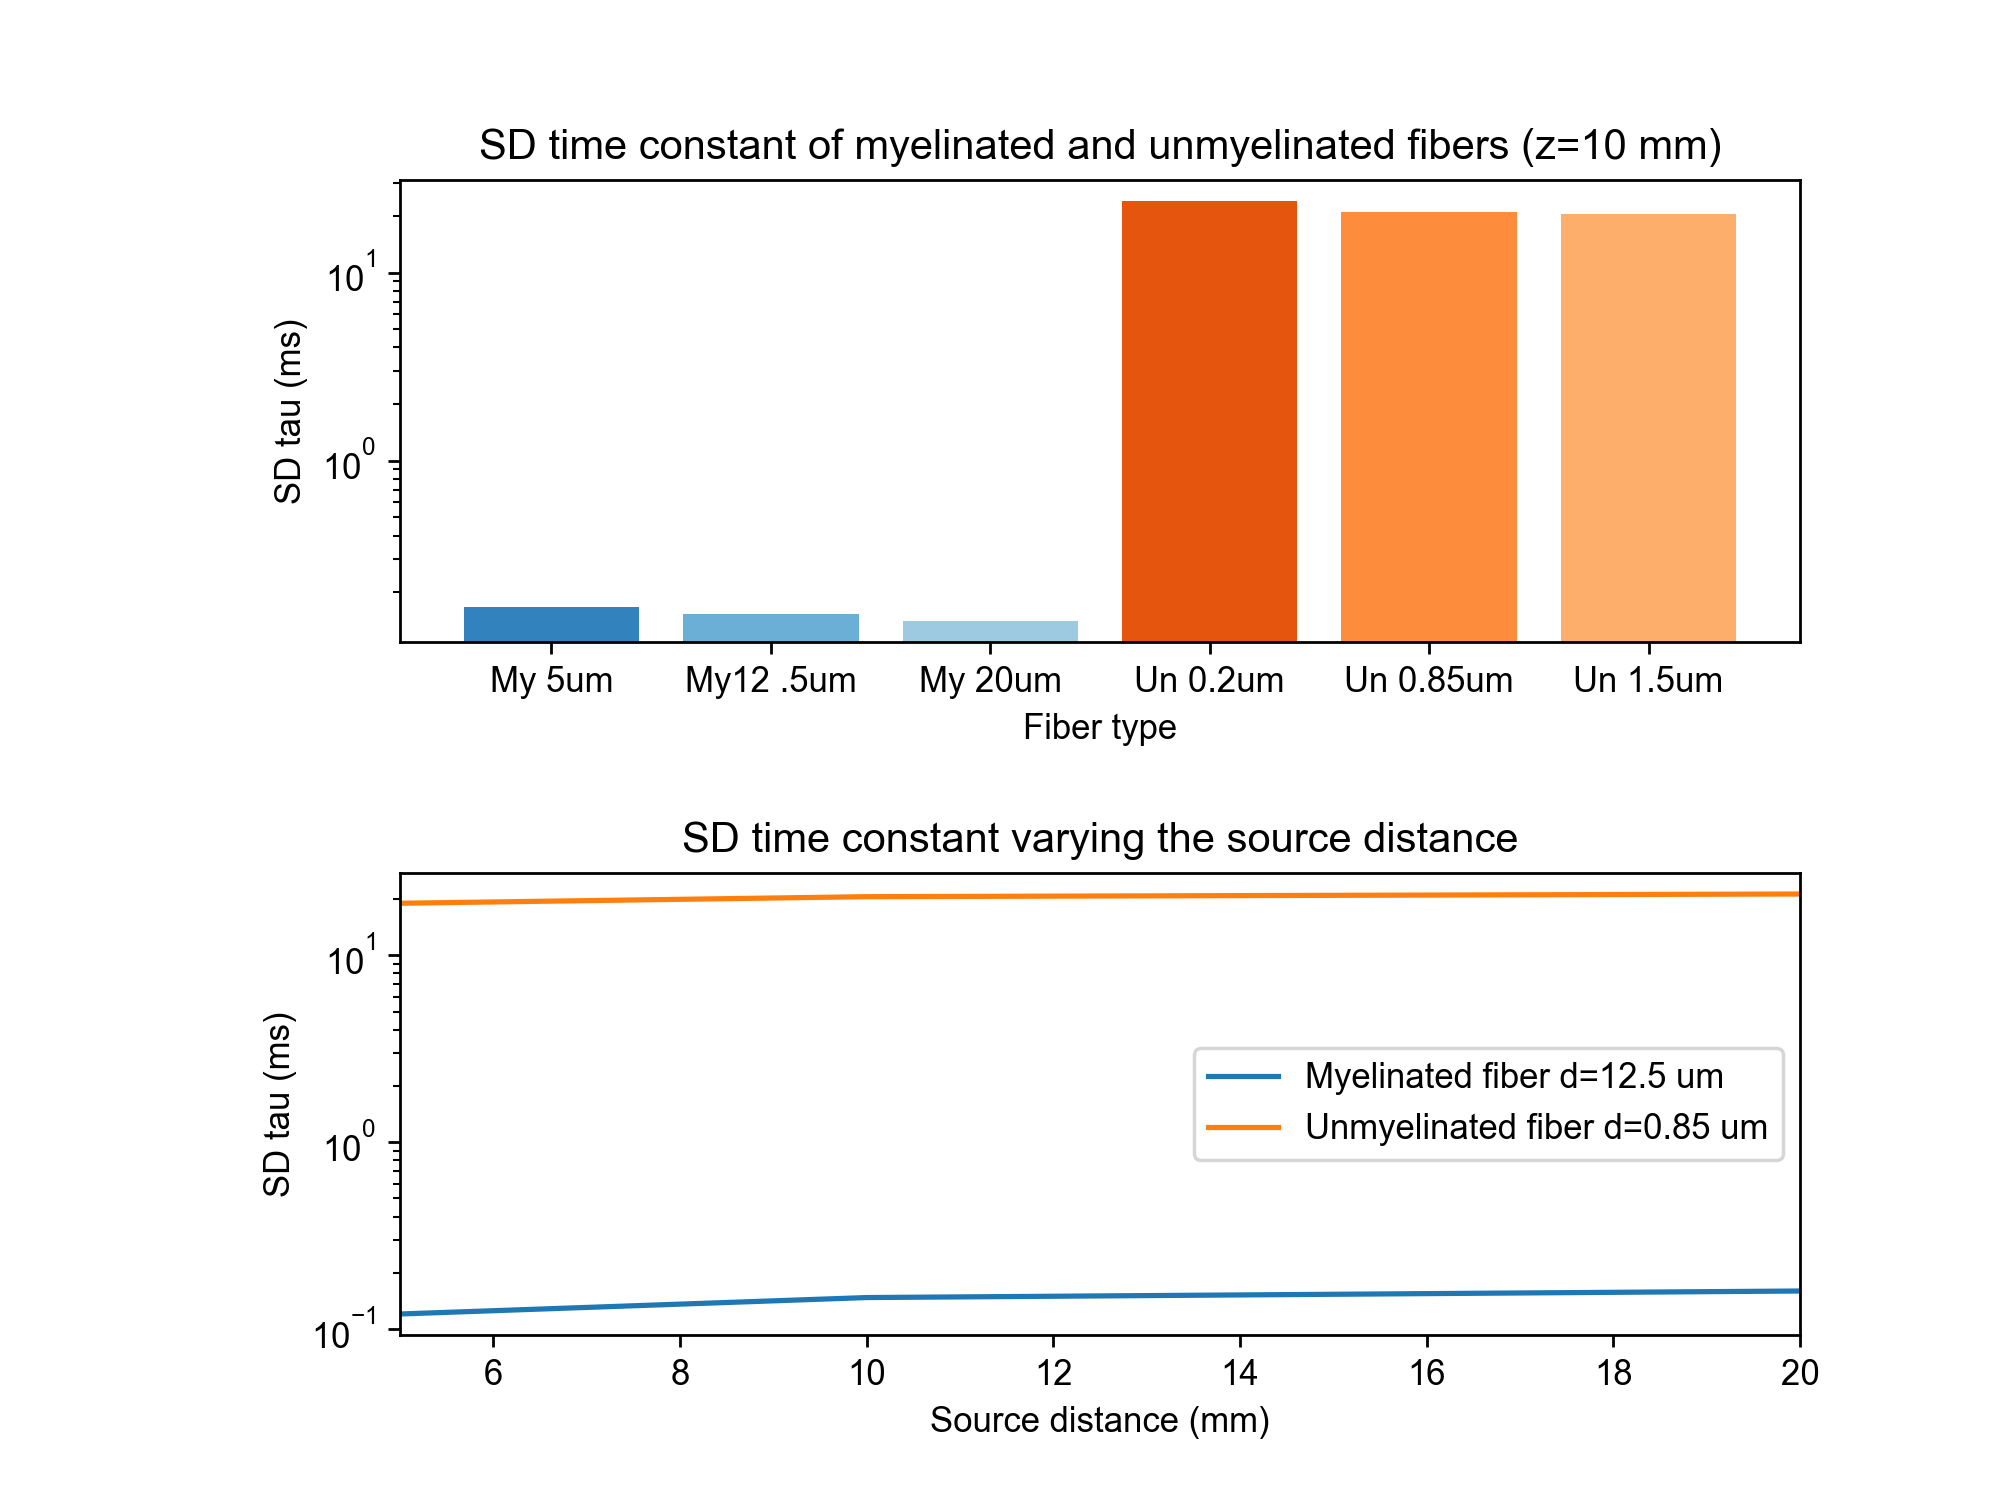

<IPython.core.display.Javascript object>


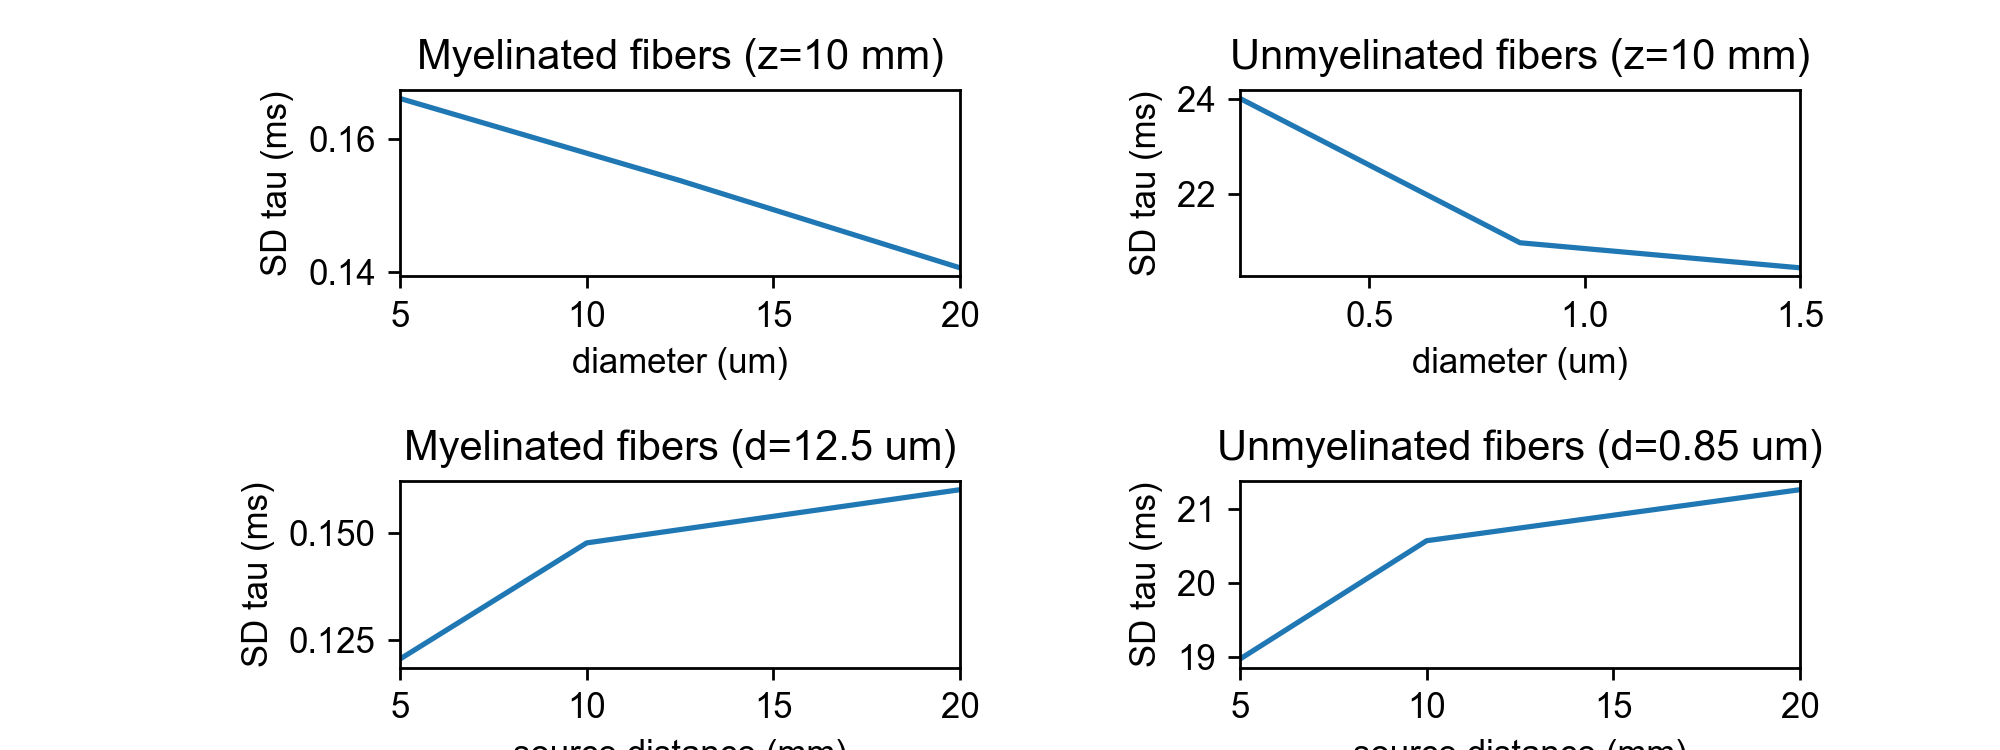

In [18]:
n_dia = 3
diameters_myel = np.linspace(5e-6, 20e-6, n_dia)
diameters_unmyel = np.linspace(0.2e-6, 1.5e-6, n_dia)
SDtau_myel = [SDtau_myel_z10mm[0], SDtau_myel_z10mm[2], SDtau_myel_z10mm[4]]
SDtau_unmyel = [SDtau_unmyel_z10mm[0], SDtau_unmyel_z10mm[2], SDtau_unmyel_z10mm[4]]
SDtau = np.concatenate((SDtau_myel, SDtau_unmyel))

# Rheobase current plot varying the fiber diameter ans the source distance
%matplotlib notebook
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
plt.subplots_adjust(left = 0.2, hspace=0.5)
ax=axes[0]
colors = plt.get_cmap('tab20c').colors
colors = [colors[0], colors[1], colors[2], colors[4], colors[5], colors[6]]
labels = ('My 5um', 'My12 .5um', 'My 20um', 'Un 0.2um', 'Un 0.85um', 'Un 1.5um')
ax.bar(labels, SDtau*1e3, color=colors)
ax.set_yscale('log')
ax.set_title('SD time constant of myelinated and unmyelinated fibers (z=10 mm)')
ax.set_xlabel('Fiber type')
ax.set_ylabel('SD tau (ms)')

ax=axes[1]
ax.set_title('SD time constant varying the source distance')
ax.set_xlabel('Source distance (mm)')
ax.set_ylabel('SD tau (ms)')
x = [5e-3, 1e-2, 2e-2]
y_myel = [SDtau_myel_z5mm[3], SDtau_myel_z10mm[3], SDtau_myel_z20mm[3]]
y_unmyel = [SDtau_unmyel_z5mm[3], SDtau_unmyel_z10mm[3], SDtau_unmyel_z20mm[3]]
ax.set_xlim(5, 20)
ax.set_yscale('log')
ax.plot (np.array(x)*1e3, np.array(y_myel)*1e3, label='Myelinated fiber d=12.5 um')
ax.plot (np.array(x)*1e3, np.array(y_unmyel)*1e3, label='Unmyelinated fiber d=0.85 um')
ax.legend()

fig2, axes2 = plt.subplots(2, 2, figsize=(8, 3))
plt.subplots_adjust(left = 0.2, hspace=1.1, wspace = 0.5)
ax=axes2[0,0]
ax.set_title('Myelinated fibers (z=10 mm)')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('SD tau (ms)')
ax.set_xlim(5, 20)
ax.plot (diameters_myel*1e6, np.array(SDtau_myel)*1e3)
ax=axes2[0,1]
ax.set_title('Unmyelinated fibers (z=10 mm)')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('SD tau (ms)')
ax.set_xlim(0.2, 1.5)
ax.plot (diameters_unmyel*1e6, np.array(SDtau_unmyel)*1e3)
ax=axes2[1,0]
ax.set_title('Myelinated fibers (d=12.5 um)')
ax.set_xlabel('source distance (mm)')
ax.set_ylabel('SD tau (ms)')
ax.set_xlim(5, 20)
ax.plot (np.array(x)*1e3, np.array(y_myel)*1e3)
ax=axes2[1,1]
ax.set_title('Unmyelinated fibers (d=0.85 um)')
ax.set_xlabel('source distance (mm)')
ax.set_ylabel('SD tau (ms)')
ax.set_xlim(5, 20)
ax.plot (np.array(x)*1e3, np.array(y_unmyel)*1e3)

###  Cronaxie varying diameter and source distance

<IPython.core.display.Javascript object>


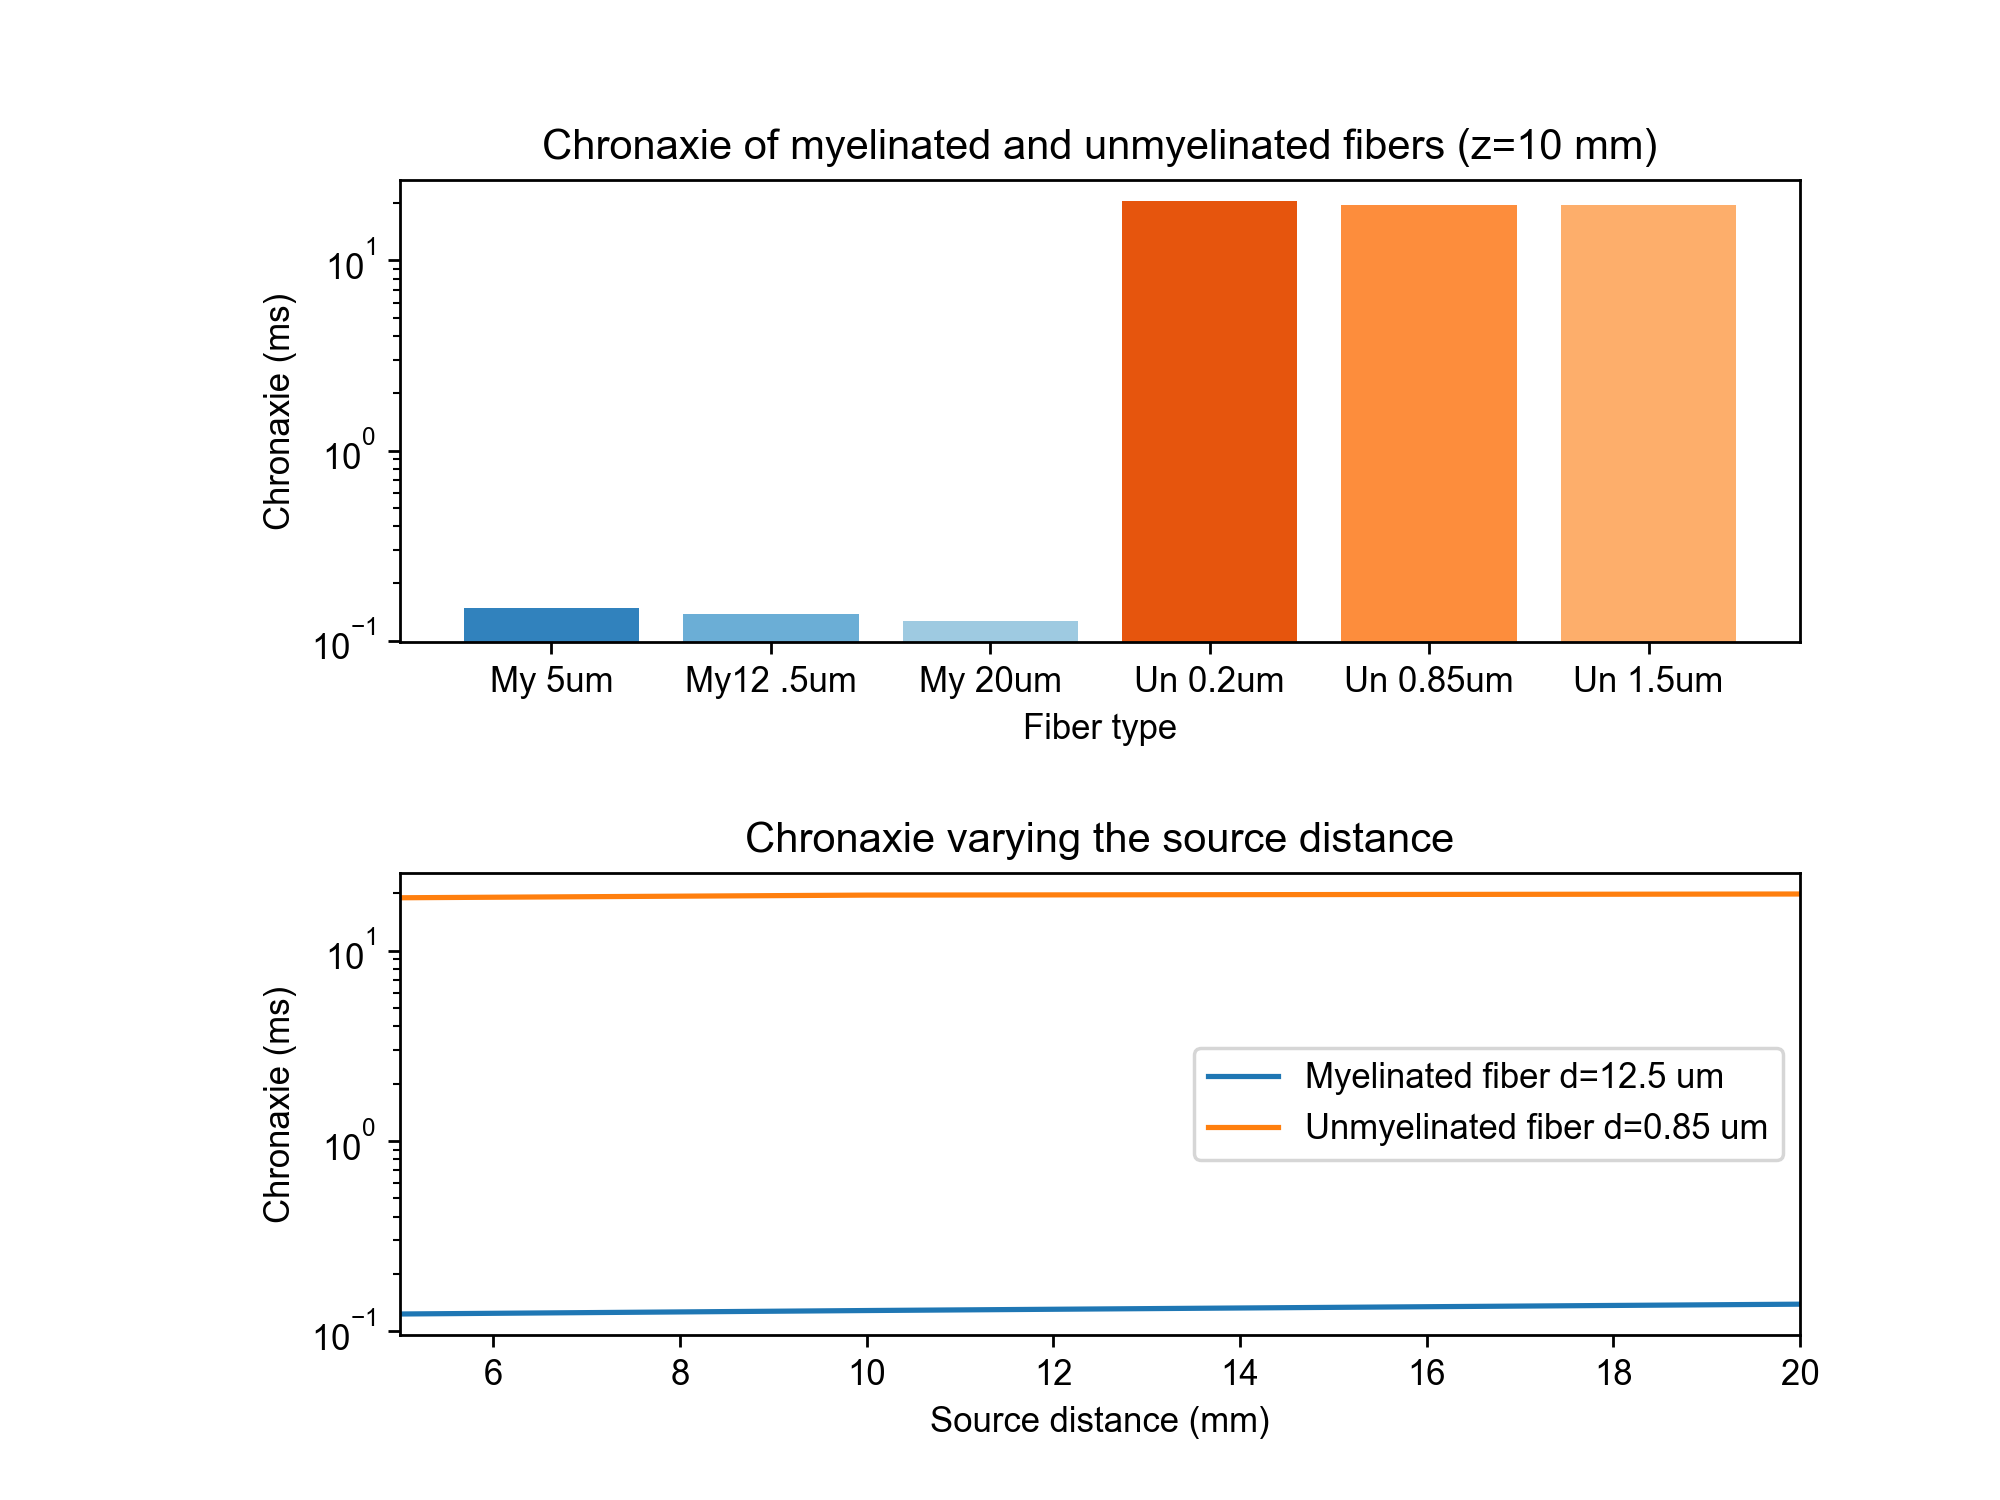

<IPython.core.display.Javascript object>


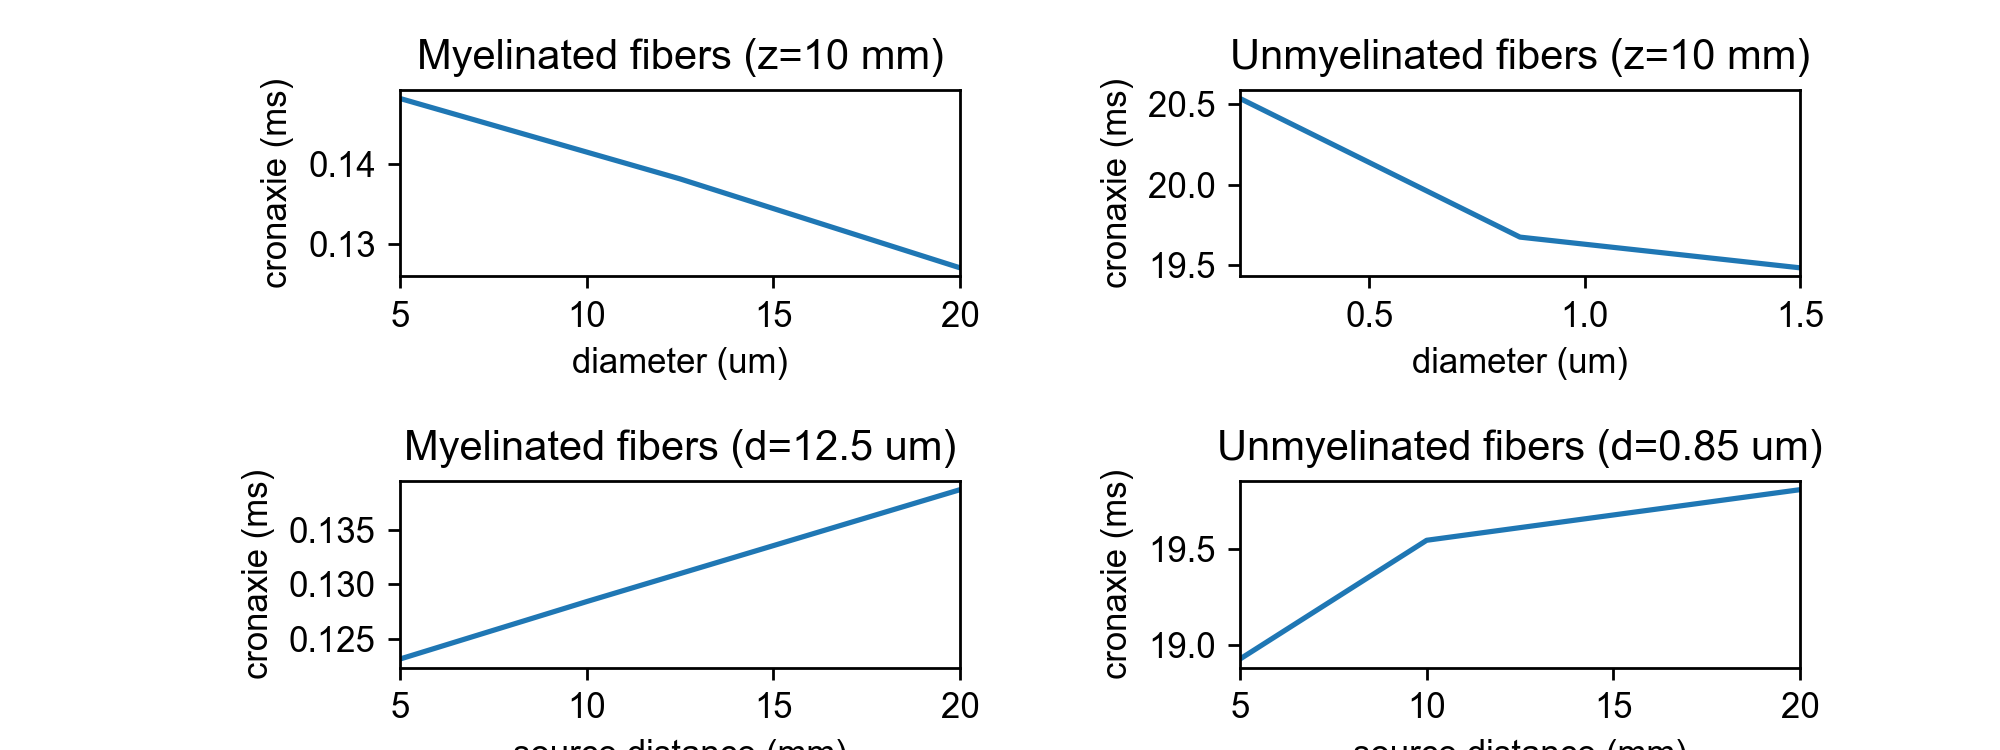

In [19]:
n_dia = 3
diameters_myel = np.linspace(5e-6, 20e-6, n_dia)
diameters_unmyel = np.linspace(0.2e-6, 1.5e-6, n_dia)
chr_myel = [chr_myel_z10mm[0], chr_myel_z10mm[2], chr_myel_z10mm[4]]
chr_unmyel = [chr_unmyel_z10mm[0], chr_unmyel_z10mm[2], chr_unmyel_z10mm[4]]
chr = np.concatenate((chr_myel, chr_unmyel))

# Rheobase current plots varying the fiber diameter and the source distance
%matplotlib notebook
fig1, axes = plt.subplots(2, 1, figsize=(8, 6))
plt.subplots_adjust(left = 0.2, hspace=0.5)
ax=axes[0]
colors = plt.get_cmap('tab20c').colors
colors = [colors[0], colors[1], colors[2], colors[4], colors[5], colors[6]]
labels = ('My 5um', 'My12 .5um', 'My 20um', 'Un 0.2um', 'Un 0.85um', 'Un 1.5um')
ax.bar(labels, chr*1e3, color=colors)
ax.set_yscale('log')
ax.set_title('Chronaxie of myelinated and unmyelinated fibers (z=10 mm)')
ax.set_xlabel('Fiber type')
ax.set_ylabel('Chronaxie (ms)')

ax=axes[1]
ax.set_title('Chronaxie varying the source distance')
ax.set_xlabel('Source distance (mm)')
ax.set_ylabel('Chronaxie (ms)')
x = [5e-3, 1e-2, 2e-2]
y_myel = [chr_myel_z5mm[3], chr_myel_z10mm[3], chr_myel_z20mm[3]]
y_unmyel = [chr_unmyel_z5mm[3], chr_unmyel_z10mm[3], chr_unmyel_z20mm[3]]
ax.set_xlim(5, 20)
ax.set_yscale('log')
ax.plot (np.array(x)*1e3, np.array(y_myel)*1e3, label='Myelinated fiber d=12.5 um')
ax.plot (np.array(x)*1e3, np.array(y_unmyel)*1e3, label='Unmyelinated fiber d=0.85 um')
ax.legend()

fig2, axes2 = plt.subplots(2, 2, figsize=(8, 3))
plt.subplots_adjust(left = 0.2, hspace=1.1, wspace = 0.5)
ax=axes2[0,0]
ax.set_title('Myelinated fibers (z=10 mm)')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('cronaxie (ms)')
ax.set_xlim(5, 20)
ax.plot (diameters_myel*1e6, np.array(chr_myel)*1e3)
ax=axes2[0,1]
ax.set_title('Unmyelinated fibers (z=10 mm)')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('cronaxie (ms)')
ax.set_xlim(0.2, 1.5)
ax.plot (diameters_unmyel*1e6, np.array(chr_unmyel)*1e3)
ax=axes2[1,0]
ax.set_title('Myelinated fibers (d=12.5 um)')
ax.set_xlabel('source distance (mm)')
ax.set_ylabel('cronaxie (ms)')
ax.set_xlim(5, 20)
ax.plot (np.array(x)*1e3, np.array(y_myel)*1e3)
ax=axes2[1,1]
ax.set_title('Unmyelinated fibers (d=0.85 um)')
ax.set_xlabel('source distance (mm)')
ax.set_ylabel('cronaxie (ms)')
ax.set_xlim(5, 20)
ax.plot (np.array(x)*1e3, np.array(y_unmyel)*1e3)

##  Current-distance relation for unmyelinated fibers

Analysing the current-source behaviour of the fiber under extracellular stimulation we can obtain the excitation thresholds for cathodic and anodic currents. 

###  Comparison with Rattay current-distance plot (1987)

In [72]:
#Stimulation parameters
fiber_class = IextraFiber
tstim = 1e-4    # from Rattay 1987
toffset = 20e-3 
pp = PulsedProtocol(tstim, toffset)

#Fiber parameters
fiberType = 'sundt'
fiberD = 9.6e-6   # from Rattay 1987

# Point source
n_cur = 40
n_z = 40
cur_max = 5e-3
cur_min = -5e-3
z_min = 1e-4
z_max = 1.4e-3

ExcitationMatrix_Rattay = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)

<IPython.core.display.Javascript object>


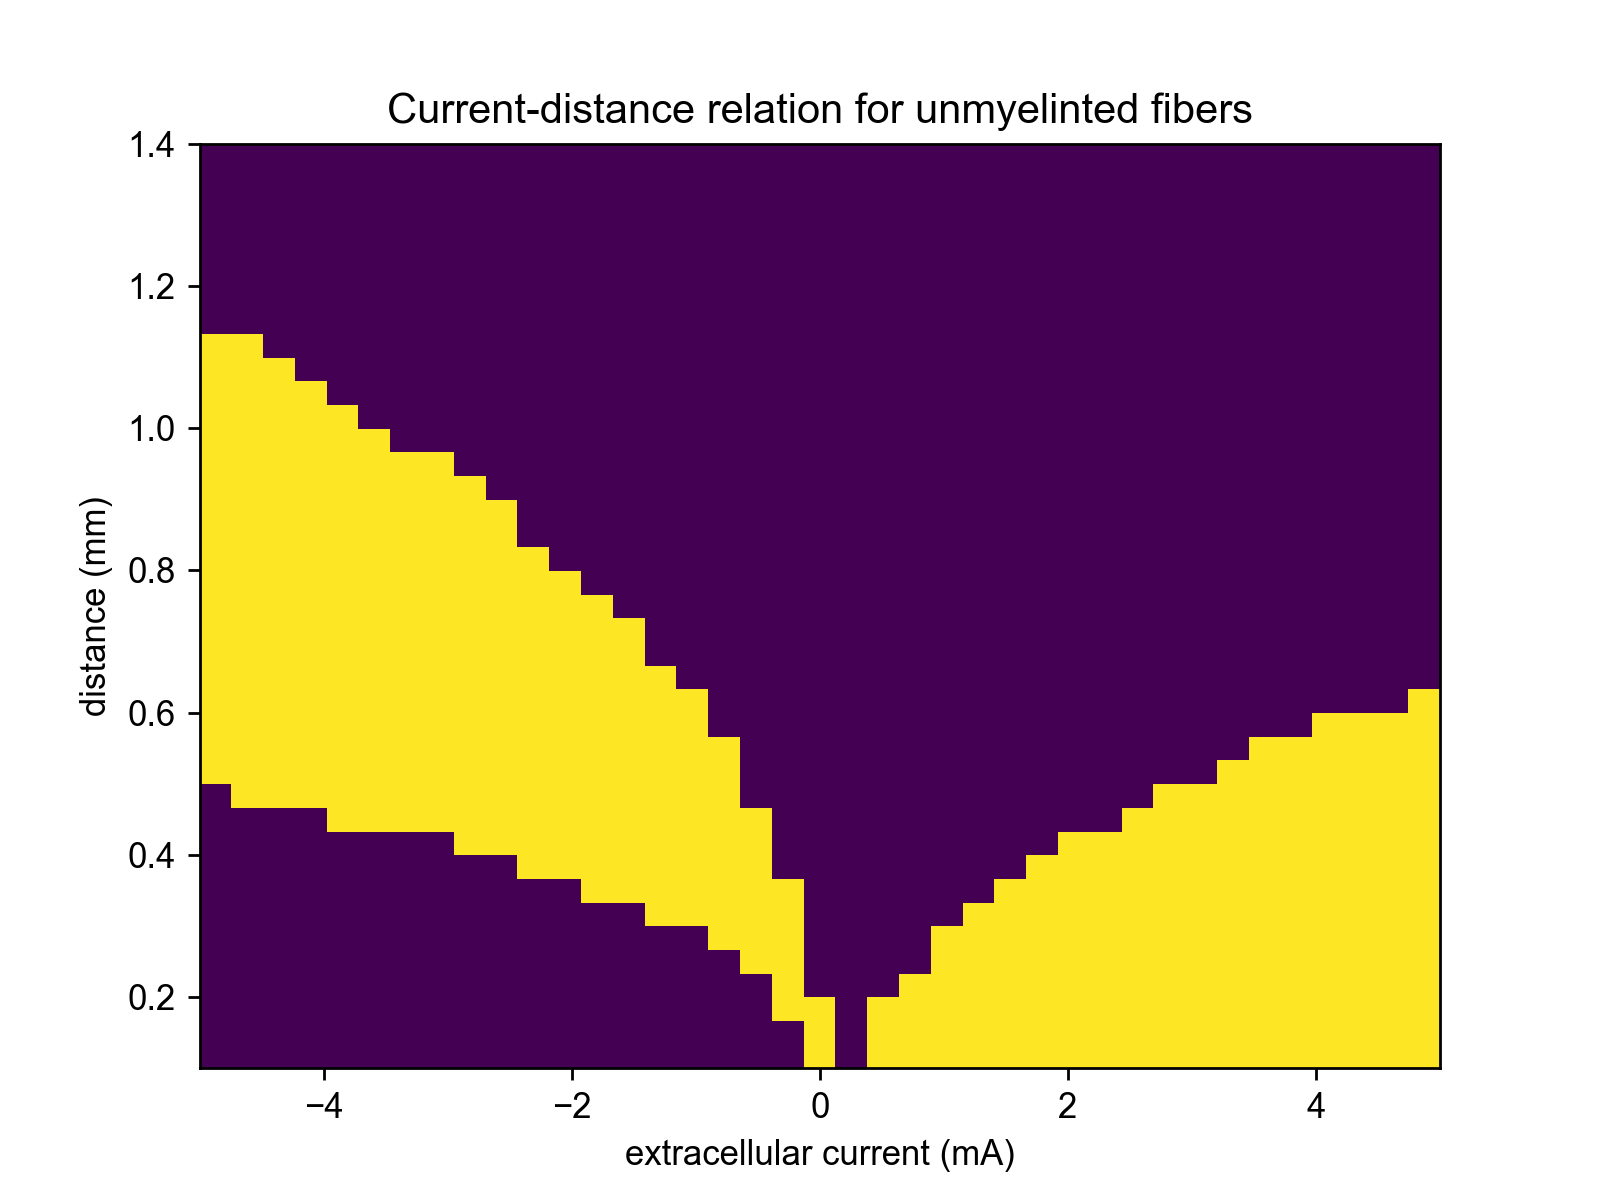

In [71]:
%matplotlib notebook
fig, axes = plt.subplots(1,1)
axes.set_title('Current-distance relation for unmyelinted fibers')
axes.set_xlabel('extracellular current (mA)')
axes.set_ylabel('distance (mm)')
currents = np.linspace(cur_min, cur_max, n_cur)
zdistances = np.linspace(z_min, z_max, n_z)
sm = axes.pcolormesh(currents*1e3, zdistances*1e3, ExcitationMatrix_Rattay, cmap='viridis')

###  Current-distance relation for 0.2, 0.85, 1.5 um unmyelinated fiber (tstim=0.1 ms)

In [21]:
fiberType = 'sundt'

#Stimulation parameters
tstim = 1e-4 
n_cur = 50
n_z = 30
cur_max = 500e-3
cur_min = -500e-3
z_min = 0.5e-4
z_max = 3e-3

fiberD = 0.2e-6
ExcitationMatrix_unmyel0 = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)
fiberD = 0.85e-6
ExcitationMatrix_unmyel1 = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)
fiberD = 1.5e-6
ExcitationMatrix_unmyel2 = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)

<IPython.core.display.Javascript object>


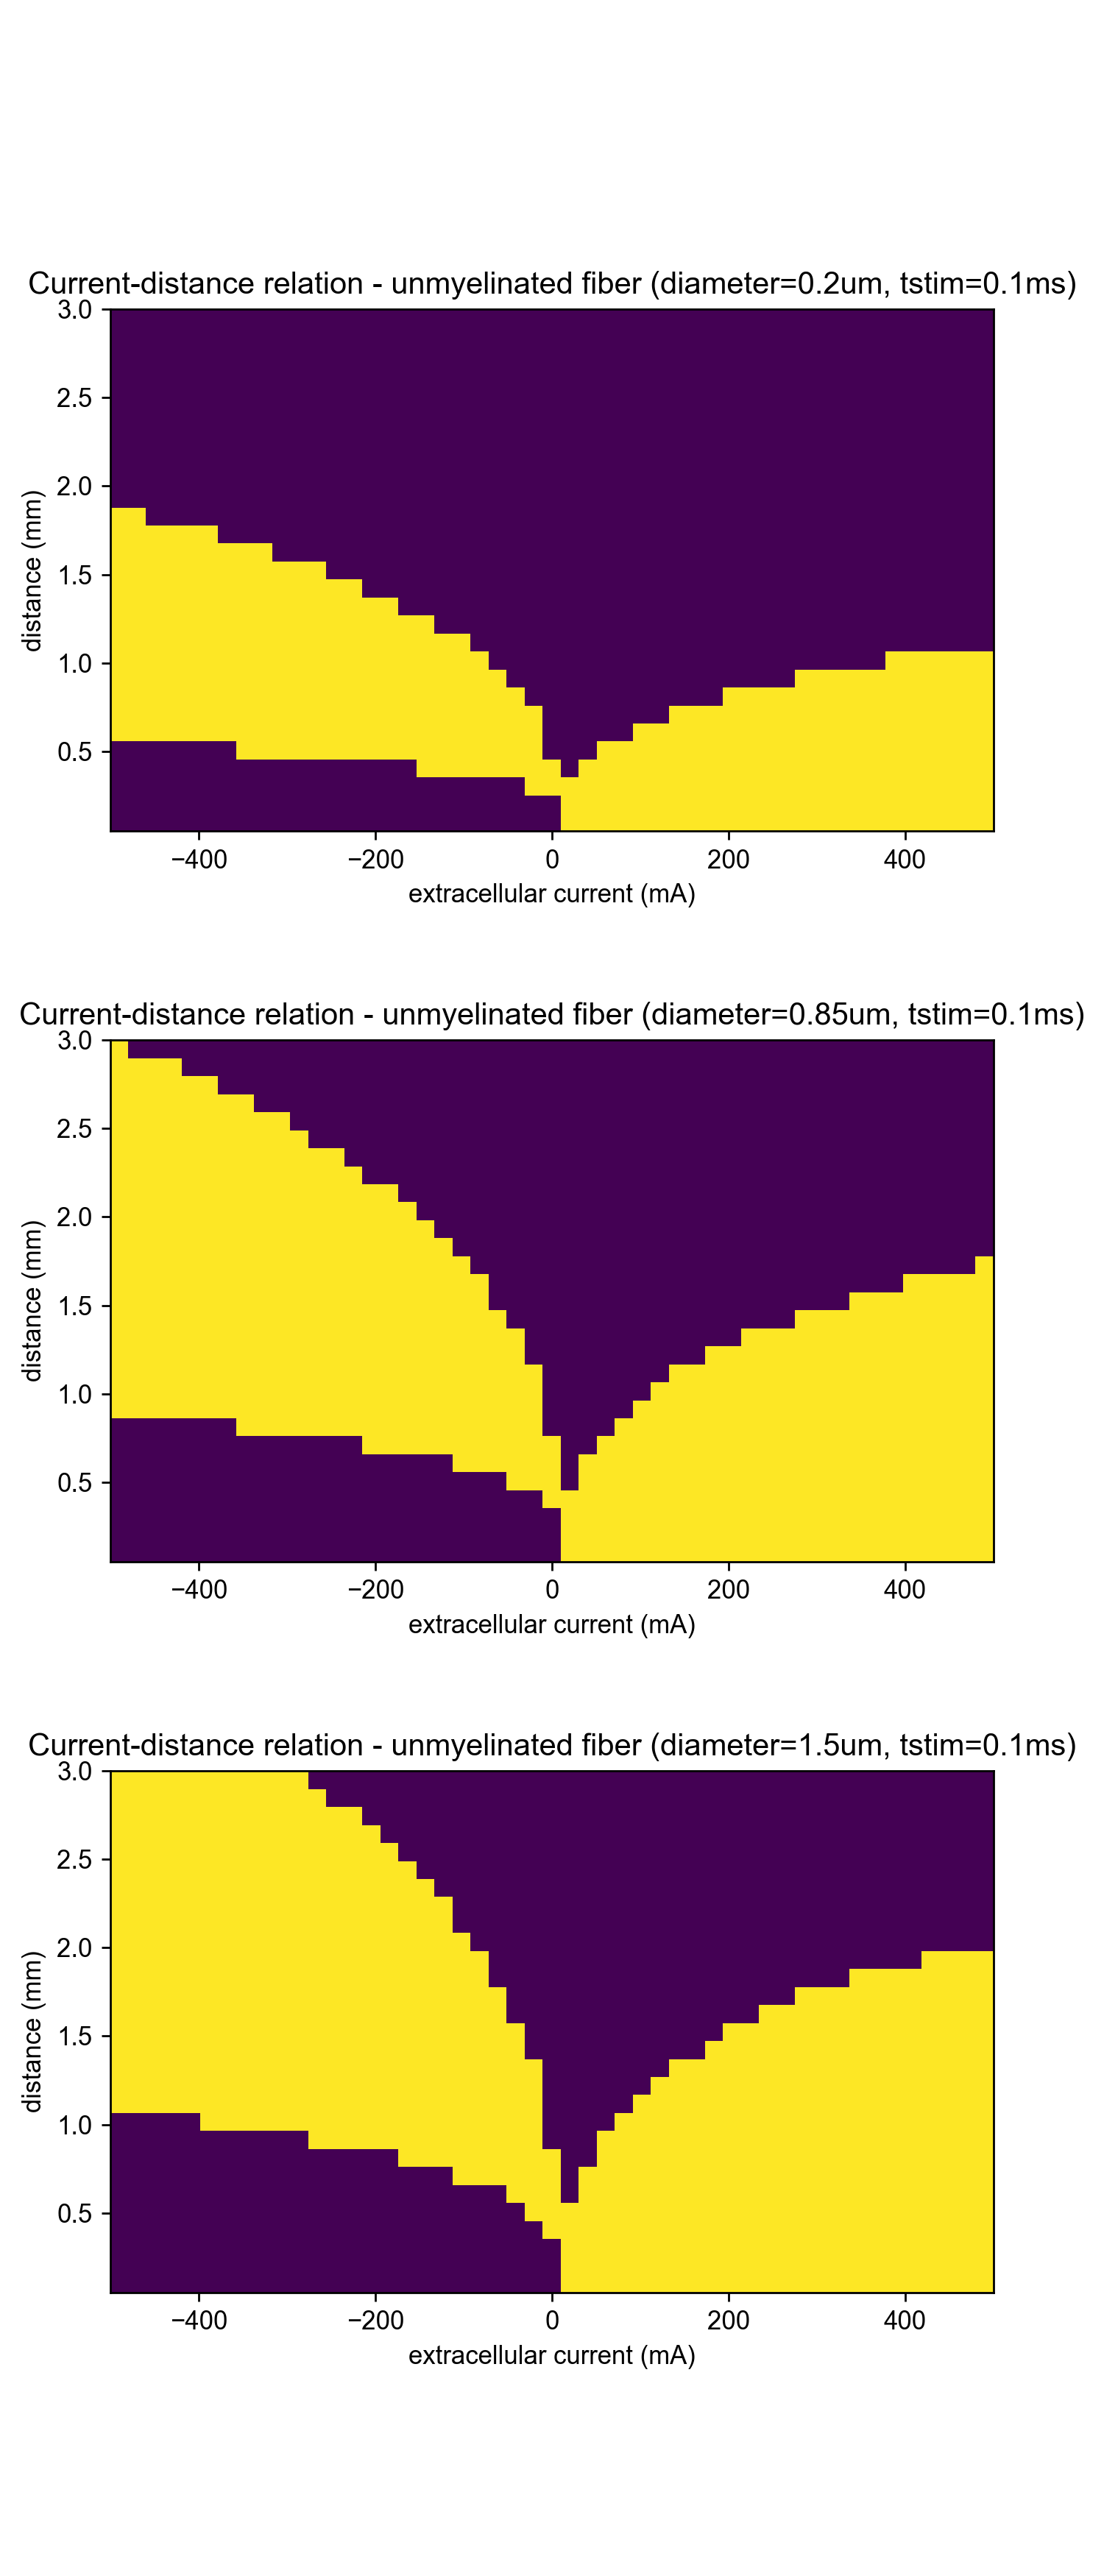

In [22]:
%matplotlib notebook
fig, axes = plt.subplots(3, 1, figsize=(6, 14))
plt.subplots_adjust(left = 0.1, hspace=0.4)
ax = axes[0]
ax.set_title('Current-distance relation - unmyelinated fiber (diameter=0.2um, tstim=0.1ms)')
ax.set_xlabel('extracellular current (mA)')
ax.set_ylabel('distance (mm)')
currents = np.linspace(cur_min, cur_max, n_cur)
zdistances = np.linspace(z_min, z_max, n_z)
sm = ax.pcolormesh(currents*1e3, zdistances*1e3, ExcitationMatrix_unmyel0, cmap='viridis')
ax = axes[1]
ax.set_title('Current-distance relation - unmyelinated fiber (diameter=0.85um, tstim=0.1ms)')
ax.set_xlabel('extracellular current (mA)')
ax.set_ylabel('distance (mm)')
sm = ax.pcolormesh(currents*1e3, zdistances*1e3, ExcitationMatrix_unmyel1, cmap='viridis')
ax = axes[2]
ax.set_title('Current-distance relation - unmyelinated fiber (diameter=1.5um, tstim=0.1ms)')
ax.set_xlabel('extracellular current (mA)')
ax.set_ylabel('distance (mm)')
sm = ax.pcolormesh(currents*1e3, zdistances*1e3, ExcitationMatrix_unmyel2, cmap='viridis')

##  Current-distance relation for myelinated fibers

In [68]:
fiberType = 'reilly'

#Stimulation parameters
tstim = 1e-4 
n_cur = 100
n_z = 60
cur_max = 50e-3
cur_min = -50e-3
z_min = 5e-4
z_max = 10e-3

fiberD = 5e-6
ExcitationMatrix_myel0 = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)
fiberD = 12.5e-6
ExcitationMatrix_myel1 = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)
fiberD = 20e-6
ExcitationMatrix_myel2 = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)

<IPython.core.display.Javascript object>


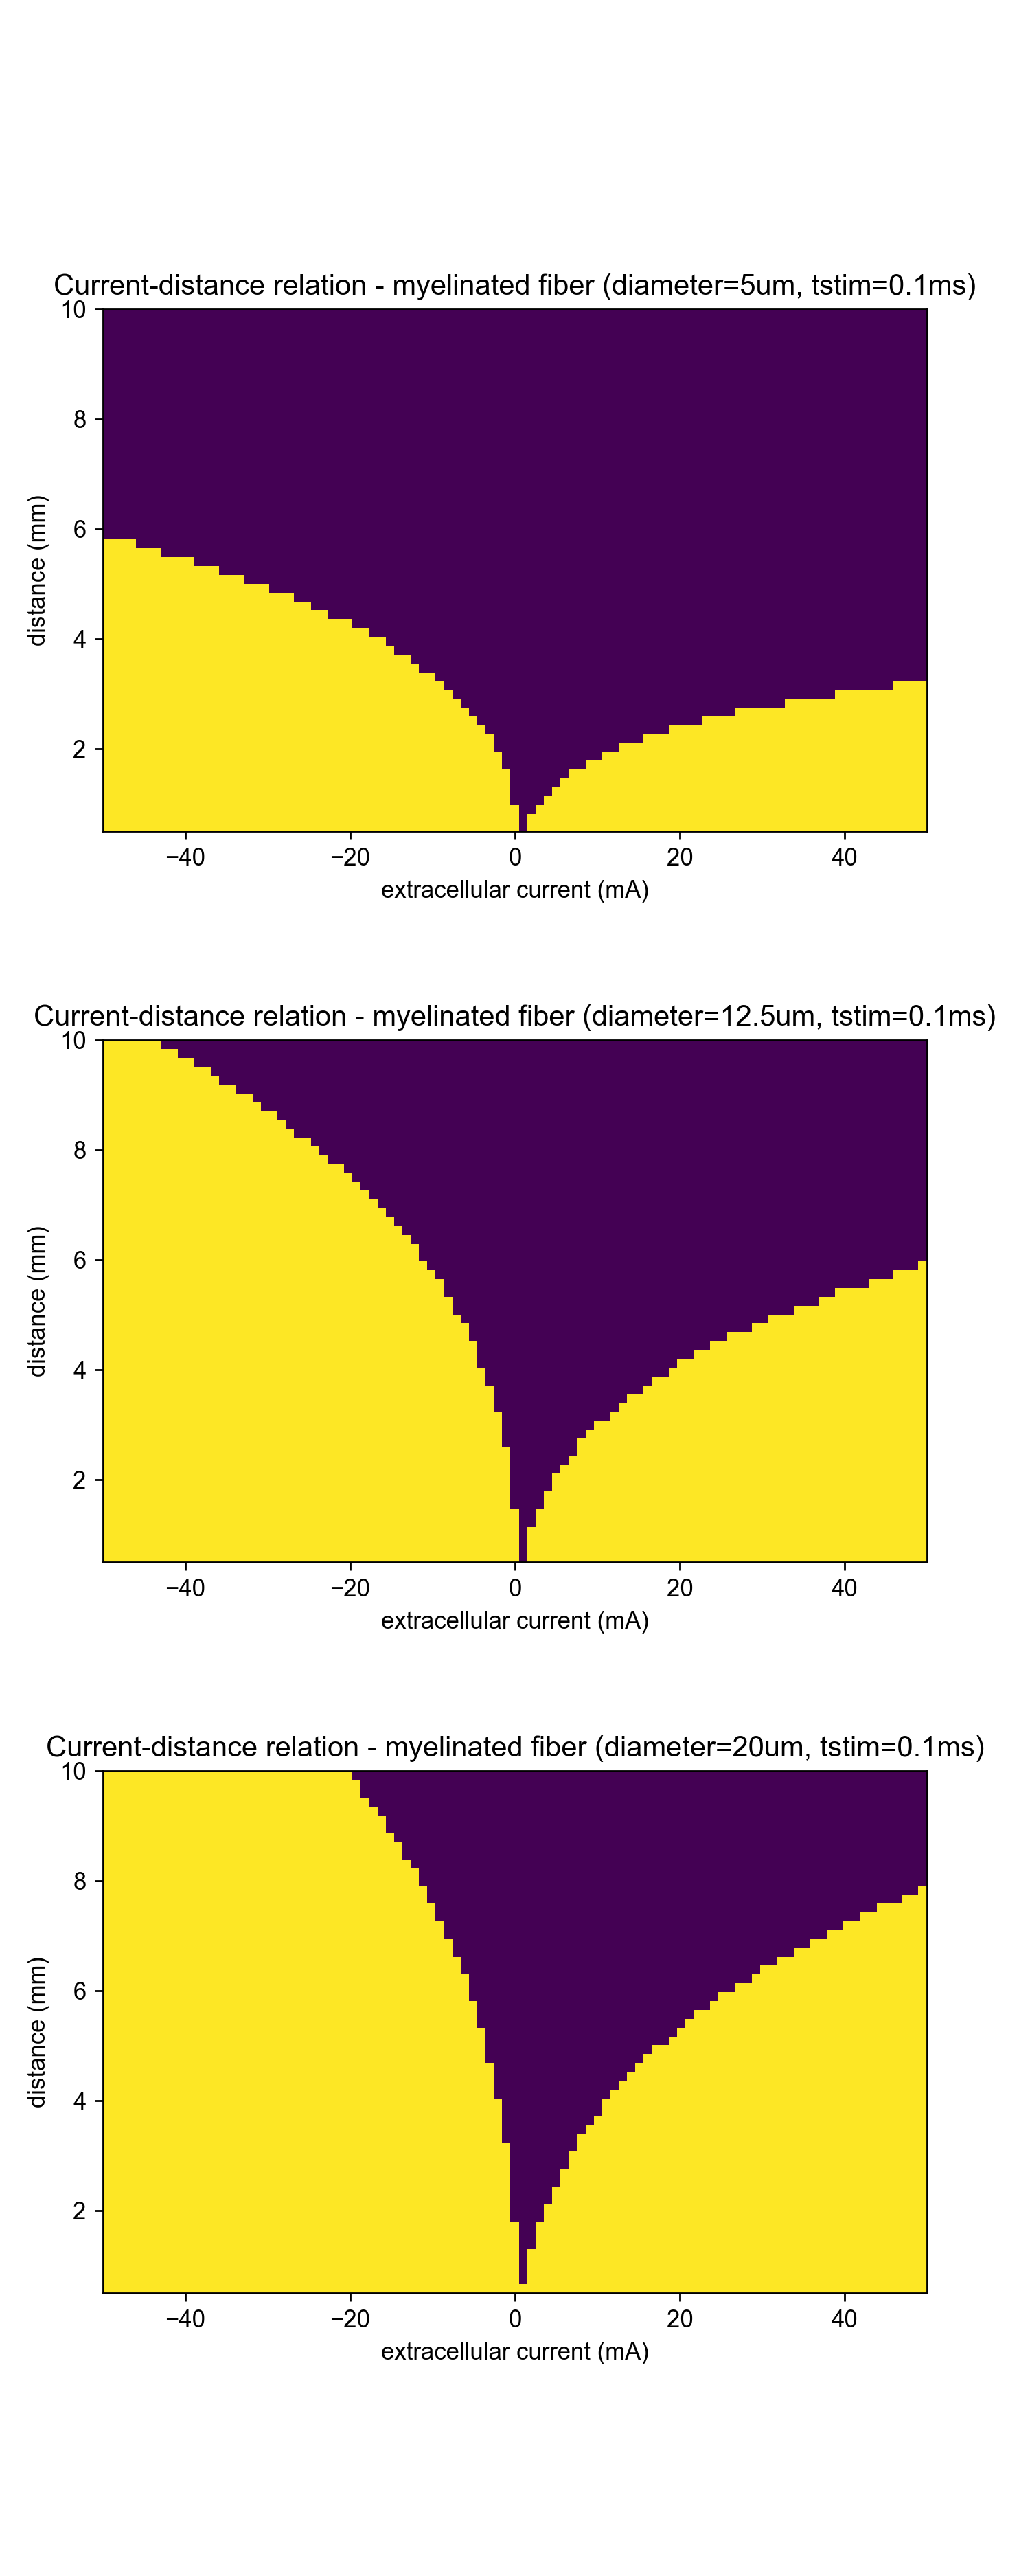

In [67]:
%matplotlib notebook
fig, axes = plt.subplots(3, 1, figsize=(6, 14))
plt.subplots_adjust(left = 0.1, hspace=0.4)
ax = axes[0]
ax.set_title('Current-distance relation - myelinated fiber (diameter=5um, tstim=0.1ms)')
ax.set_xlabel('extracellular current (mA)')
ax.set_ylabel('distance (mm)')
currents = np.linspace(cur_min, cur_max, n_cur)
zdistances = np.linspace(z_min, z_max, n_z)
sm = ax.pcolormesh(currents*1e3, zdistances*1e3, ExcitationMatrix_myel0, cmap='viridis')
ax = axes[1]
ax.set_title('Current-distance relation - myelinated fiber (diameter=12.5um, tstim=0.1ms)')
ax.set_xlabel('extracellular current (mA)')
ax.set_ylabel('distance (mm)')
sm = ax.pcolormesh(currents*1e3, zdistances*1e3, ExcitationMatrix_myel1, cmap='viridis')
ax = axes[2]
ax.set_title('Current-distance relation - myelinated fiber (diameter=20um, tstim=0.1ms)')
ax.set_xlabel('extracellular current (mA)')
ax.set_ylabel('distance (mm)')
sm = ax.pcolormesh(currents*1e3, zdistances*1e3, ExcitationMatrix_myel2, cmap='viridis')

##  Compare the current-distance behaviour for myelinated and unmyelinated fibers

In [25]:
# Excitation behaviour for far distances (z < 10 mm, |I|<500 mA )
# Stimulation parameters
tstim = 1e-4 
n_cur = 100
n_z = 60
cur_max = 500e-3
cur_min = -500e-3
z_min = 5e-4
z_max = 10e-3

# Myelinated fiber: diameter 12.5 um (mean of the diameter interval)
fiberType = 'reilly'
fiberD = 12.5e-6
ExcitationMatrixFar_myel = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)

# Unmyelinated fiber: diameter 0.85 um 
fiberType = 'sundt'
fiberD = 0.85e-6
ExcitationMatrixFar_unmyel = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)

<IPython.core.display.Javascript object>


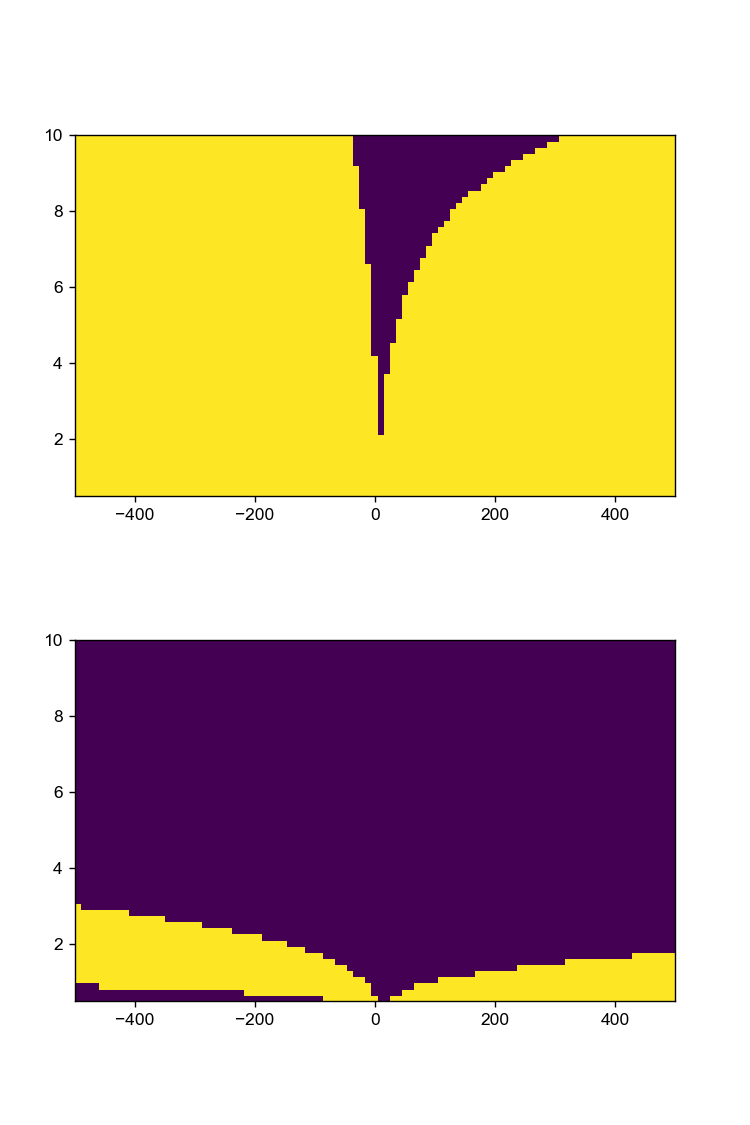

In [26]:
%matplotlib notebook
fig, axes = plt.subplots(2, 1, figsize=(6, 9))
plt.subplots_adjust(left = 0.1, hspace=0.4)
ax = axes[0]
#ax.set_title('Current-distance relation - myelinated fiber (diameter=5um, tstim=0.1ms)')
#ax.set_xlabel('extracellular current (mA)')
#ax.set_ylabel('distance (mm)')
currents = np.linspace(cur_min, cur_max, n_cur)
zdistances = np.linspace(z_min, z_max, n_z)
sm = ax.pcolormesh(currents*1e3, zdistances*1e3, ExcitationMatrixFar_myel, cmap='viridis')
ax = axes[1]
#ax.set_title('Current-distance relation - myelinated fiber (diameter=12.5um, tstim=0.1ms)')
#ax.set_xlabel('extracellular current (mA)')
#ax.set_ylabel('distance (mm)')
sm = ax.pcolormesh(currents*1e3, zdistances*1e3, ExcitationMatrixFar_unmyel, cmap='viridis')

<IPython.core.display.Javascript object>


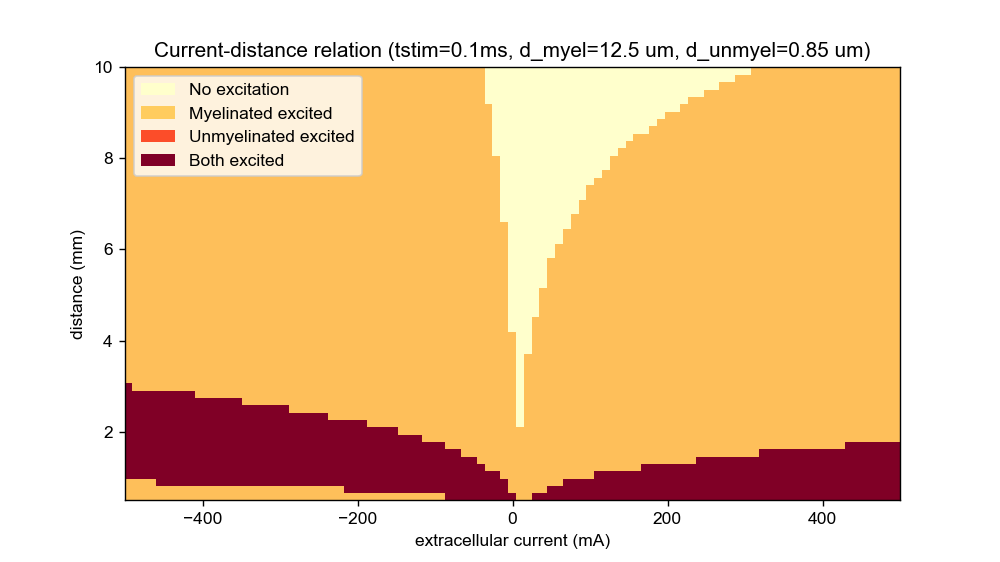

In [27]:
m = ExcitationMatrixFar_myel
u = ExcitationMatrixFar_unmyel
sum = m + u 
both = (sum == 2)
diff = m - u
myel_only = (diff == 1)
unmyel_only = (diff == -1)
tot = myel_only + 3 * both + 2 * unmyel_only

%matplotlib notebook
fig, axes = plt.subplots(figsize=(8,4.5))
axes.set_title('Current-distance relation (tstim=0.1ms, d_myel=12.5 um, d_unmyel=0.85 um)')
axes.set_xlabel('extracellular current (mA)')
axes.set_ylabel('distance (mm)')
currents = np.linspace(cur_min, cur_max, n_cur)
zdistances = np.linspace(z_min, z_max, n_z)
sm = axes.pcolormesh(currents*1e3, zdistances*1e3, tot, cmap='YlOrRd', vmin=0, vmax=3)
legend_elements = [Patch(facecolor=(1, 1, 0.8), label='No excitation'),
                   Patch(facecolor=(1, 0.8, 0.37), label='Myelinated excited'),
                   Patch(facecolor=(0.99, 0.3, 0.16), label='Unmyelinated excited'),
                   Patch(facecolor=(0.5, 0, 0.15), label='Both excited')]
axes.legend(handles=legend_elements, loc='upper left')

In [59]:
# Excitation behaviour for short distances (0.1 mm < z < 1 mm, |I|<200 mA)
# Stimulation parameters
tstim = 1e-4 
n_cur = 100
n_z = 60
cur_max = 50e-3
cur_min = -50e-3
z_min = 1.5e-4
z_max = 2e-3

# Myelinated fiber: diameter 12.5 um (mean of the diameter interval)
fiberType = 'reilly'
fiberD = 12.5e-6
ExcitationMatrixShort_myel = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)

# Unmyelinated fiber: diameter 0.85 um 
fiberType = 'sundt'
fiberD = 0.85e-6
ExcitationMatrixShort_unmyel = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)

<IPython.core.display.Javascript object>


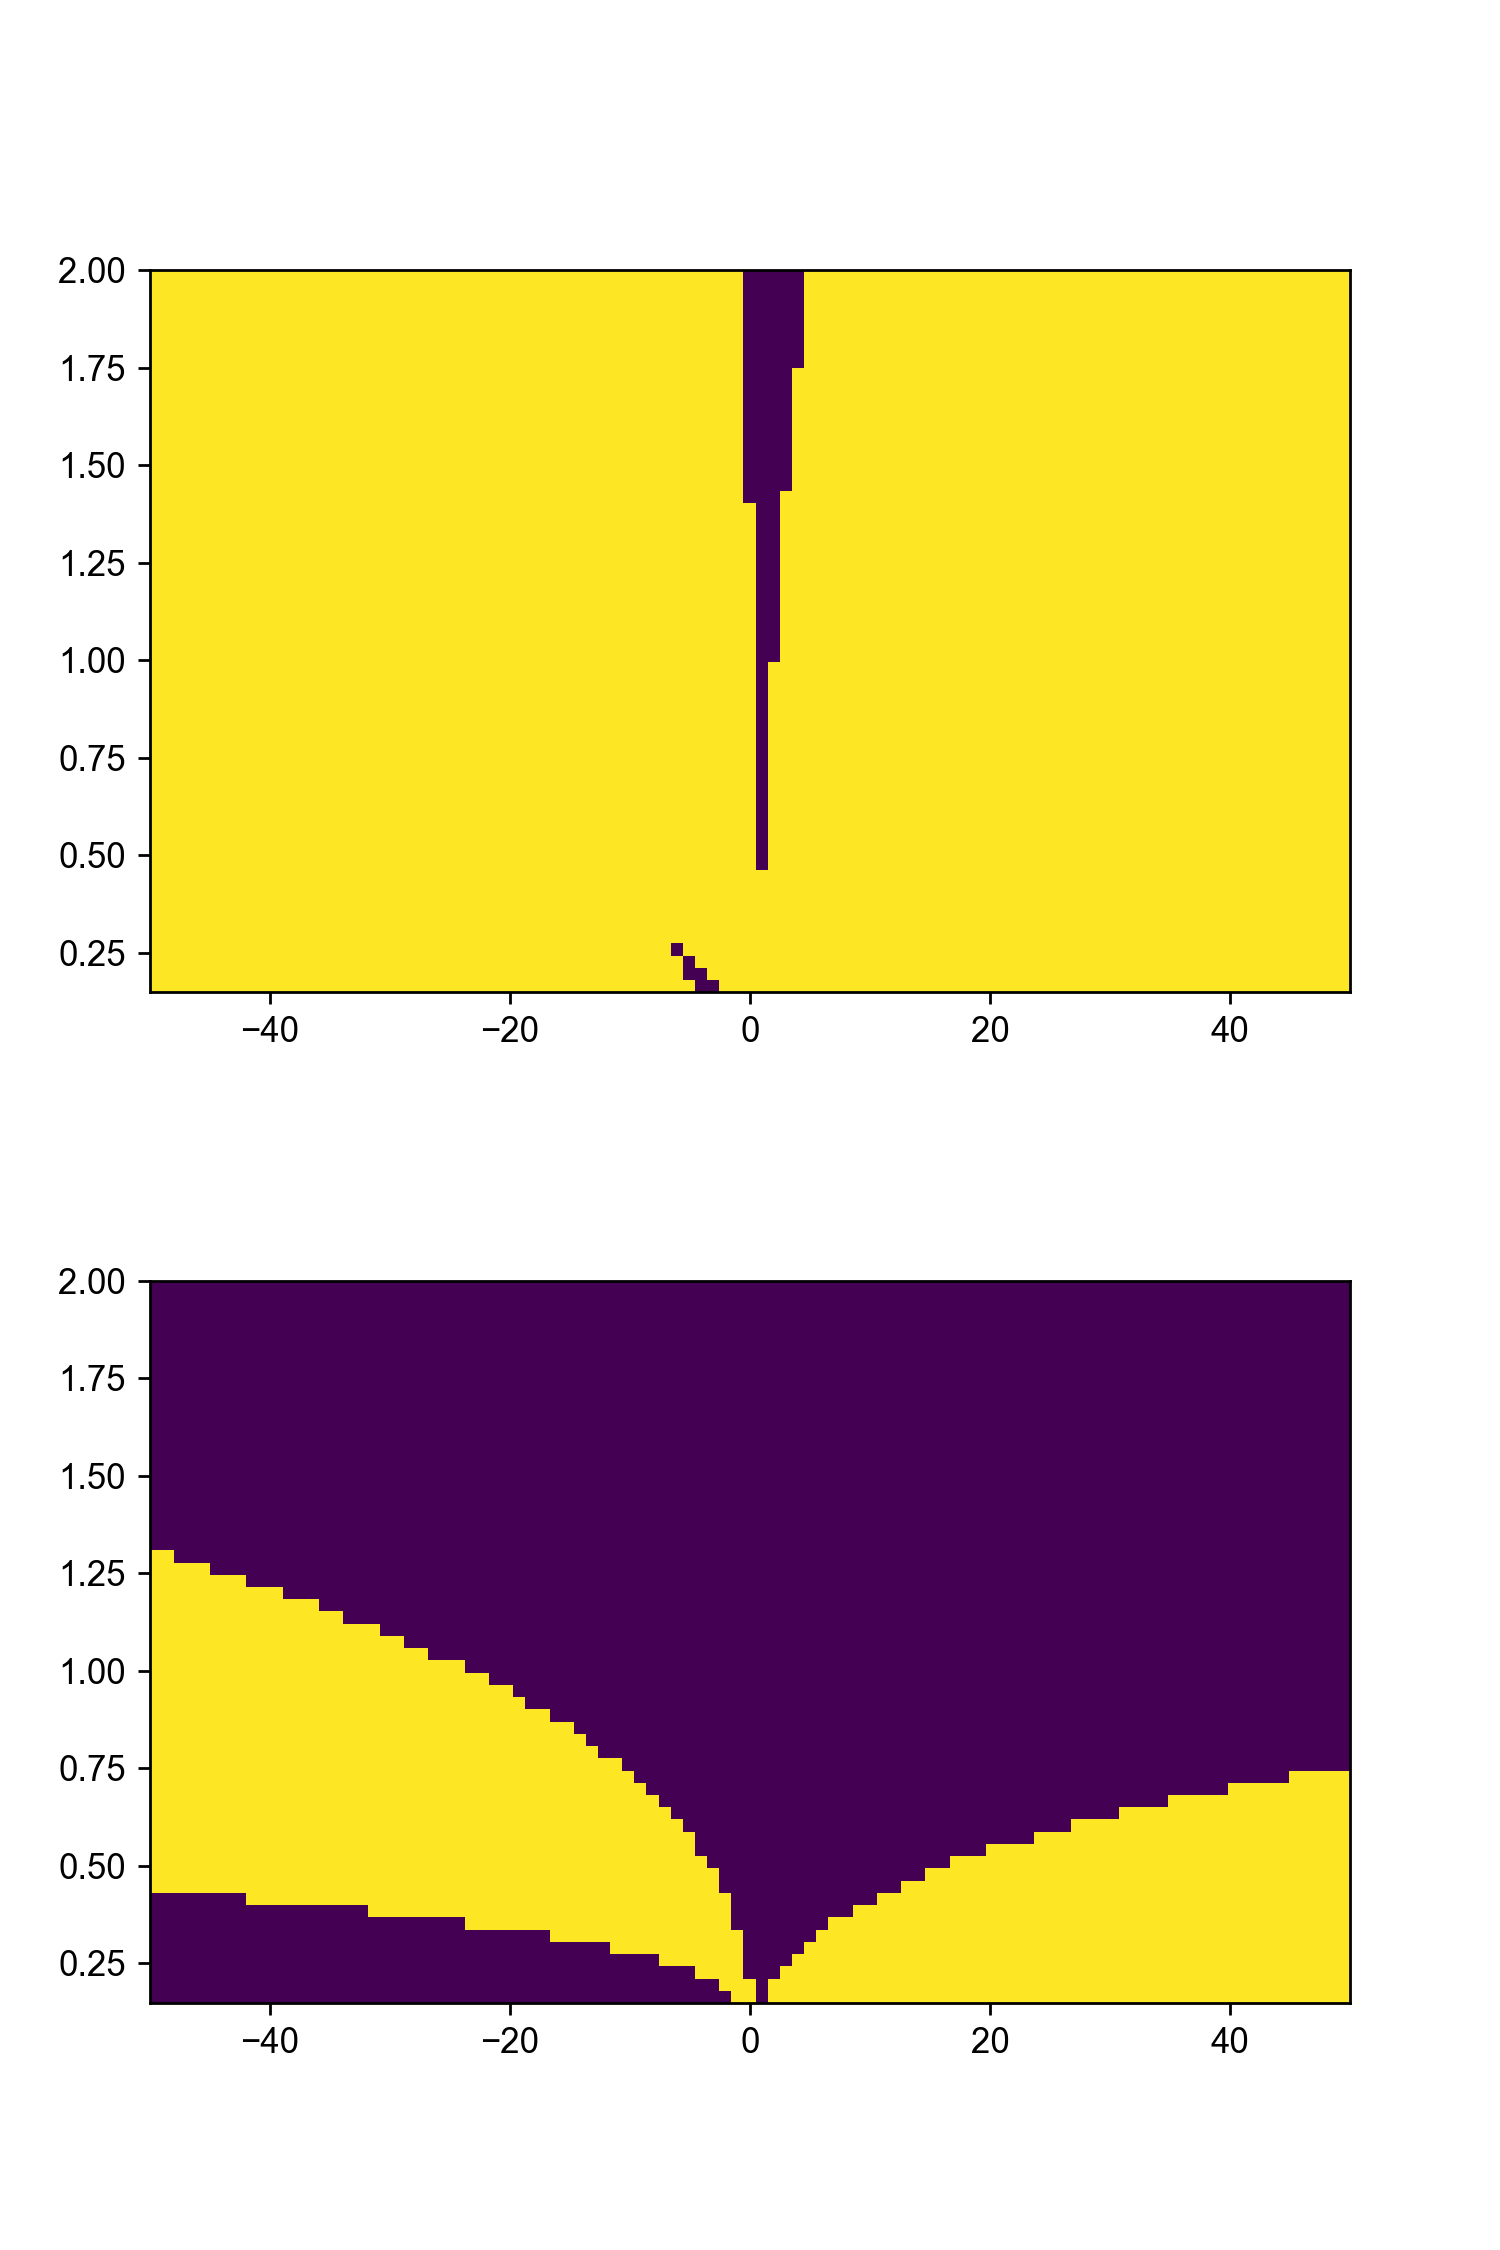

In [64]:
%matplotlib notebook
fig, axes = plt.subplots(2, 1, figsize=(6, 9))
plt.subplots_adjust(left = 0.1, hspace=0.4)
ax = axes[0]
currents = np.linspace(cur_min, cur_max, n_cur)
zdistances = np.linspace(z_min, z_max, n_z)
sm = ax.pcolormesh(currents*1e3, zdistances*1e3, ExcitationMatrixShort_myel, cmap='viridis')
ax = axes[1]
sm = ax.pcolormesh(currents*1e3, zdistances*1e3, ExcitationMatrixShort_unmyel, cmap='viridis')

<IPython.core.display.Javascript object>


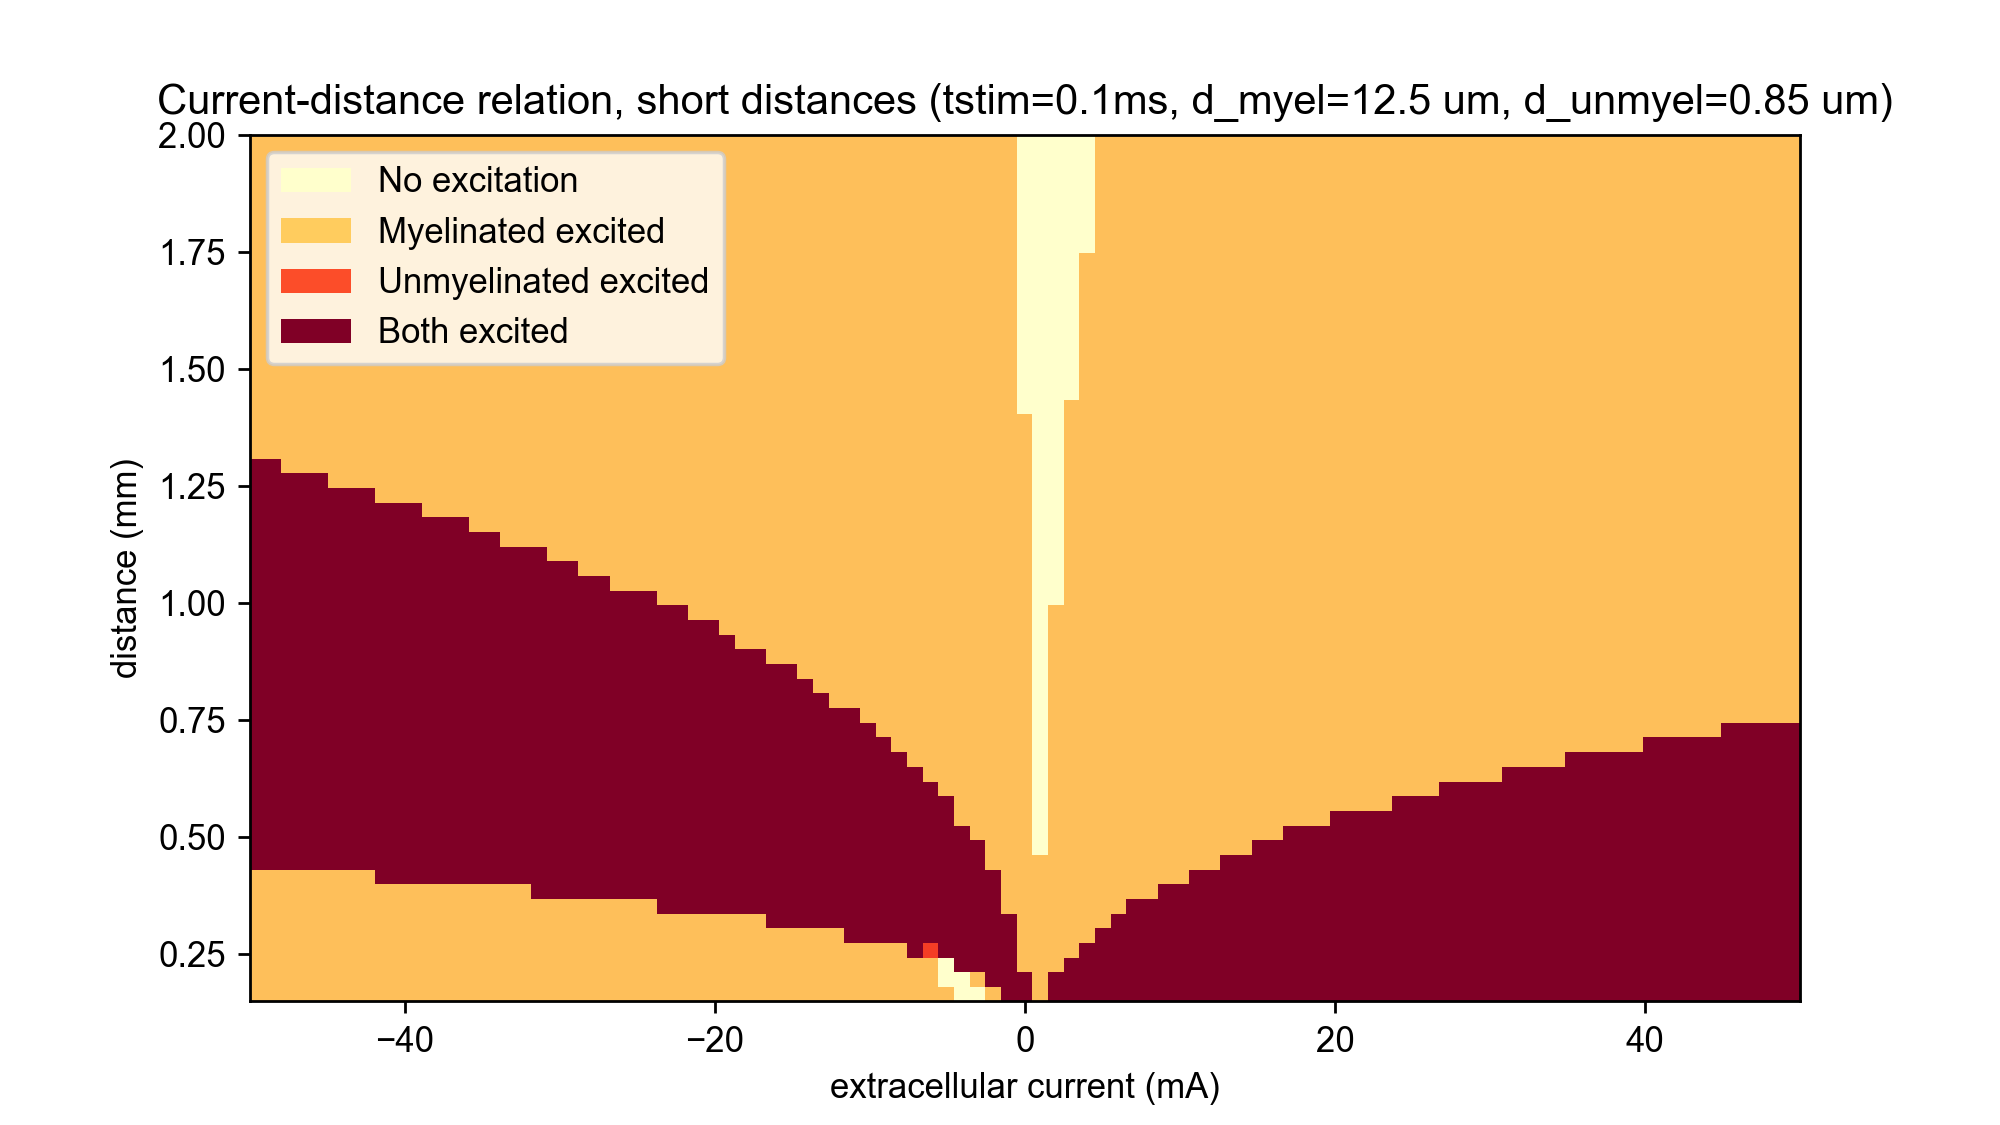

In [65]:
m = ExcitationMatrixShort_myel
u = ExcitationMatrixShort_unmyel
sum = m + u 
both = (sum == 2)
diff = m - u
myel_only = (diff == 1)
unmyel_only = (diff == -1)
tot = myel_only + 3 * both + 2 * unmyel_only

%matplotlib notebook
fig, axes = plt.subplots(figsize=(8,4.5))
axes.set_title('Current-distance relation, short distances (tstim=0.1ms, d_myel=12.5 um, d_unmyel=0.85 um)')
axes.set_xlabel('extracellular current (mA)')
axes.set_ylabel('distance (mm)')
currents = np.linspace(cur_min, cur_max, n_cur)
zdistances = np.linspace(z_min, z_max, n_z)
sm = axes.pcolormesh(currents*1e3, zdistances*1e3, tot, cmap='YlOrRd', vmin=0, vmax=3)
legend_elements = [Patch(facecolor=(1, 1, 0.8), label='No excitation'),
                   Patch(facecolor=(1, 0.8, 0.37), label='Myelinated excited'),
                   Patch(facecolor=(0.99, 0.3, 0.16), label='Unmyelinated excited'),
                   Patch(facecolor=(0.5, 0, 0.15), label='Both excited')]
axes.legend(handles=legend_elements, loc='upper left')

In [25]:
# Excitation behaviour for far distances (z < 10 mm, |I|<500 mA )
# Stimulation parameters
tstim = 1e-4 
n_cur = 100
n_z = 60
cur_max = 500e-3
cur_min = -500e-3
z_min = 5e-4
z_max = 10e-3

# Myelinated fiber: diameter 12.5 um (mean of the diameter interval)
fiberType = 'reilly'
fiberD = 12.5e-6
ExcitationMatrixFar_myel = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)

# Unmyelinated fiber: diameter 0.85 um 
fiberType = 'sundt'
fiberD = 0.85e-6
ExcitationMatrixFar_unmyel = currentDistance(fiberType, fiberD, tstim, n_cur, cur_min, cur_max, n_z, z_min, z_max, outdirCD)

<IPython.core.display.Javascript object>


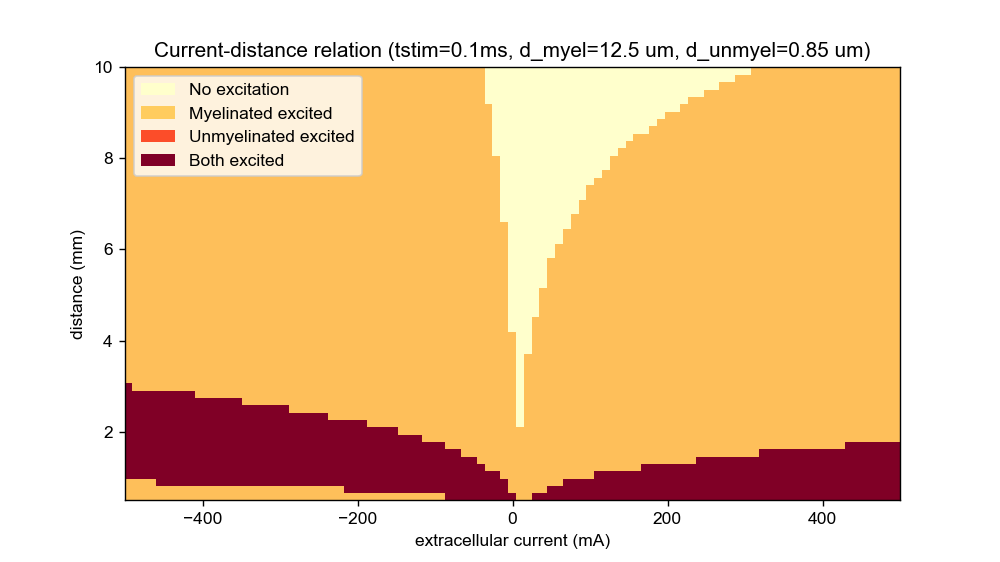

In [27]:
m = ExcitationMatrixFar_myel
u = ExcitationMatrixFar_unmyel
sum = m + u 
both = (sum == 2)
diff = m - u
myel_only = (diff == 1)
unmyel_only = (diff == -1)
tot = myel_only + 3 * both + 2 * unmyel_only

%matplotlib notebook
fig, axes = plt.subplots(figsize=(8,4.5))
axes.set_title('Current-distance relation (tstim=0.1ms, d_myel=12.5 um, d_unmyel=0.85 um)')
axes.set_xlabel('extracellular current (mA)')
axes.set_ylabel('distance (mm)')
currents = np.linspace(cur_min, cur_max, n_cur)
zdistances = np.linspace(z_min, z_max, n_z)
sm = axes.pcolormesh(currents*1e3, zdistances*1e3, tot, cmap='YlOrRd', vmin=0, vmax=3)
legend_elements = [Patch(facecolor=(1, 1, 0.8), label='No excitation'),
                   Patch(facecolor=(1, 0.8, 0.37), label='Myelinated excited'),
                   Patch(facecolor=(0.99, 0.3, 0.16), label='Unmyelinated excited'),
                   Patch(facecolor=(0.5, 0, 0.15), label='Both excited')]
axes.legend(handles=legend_elements, loc='upper left')

##  Conclusions

###  References

- Reilly, J.P., Freeman, V.T., and Larkin, W.D., *Sensory effects of transient electrical stimulation--evaluation with a neuroelectric model*, IEEE Trans Biomed Eng 32, 1001–1011, 1985.
- Sundt D, Gamper N, Jaffe DB., *Spike propagation through the dorsal root ganglia in an unmyelinated sensory neuron: a modeling study*, J Neurophysiol 114: 3140–3153, 2015.
- Rattay F., *Ways to Approximate Current-Distance Relations for Electrically Stimulated Fibers*, Z theo~ BioL 125, 339-349, 1987.